# PRoject Title : LT Foods Stock price Forecaasting using SARIMA & Fbprophrt

### **Problem Statement** :-

Time Series Analysis of LT Foods Stock

### **Problem Type** : Forecasting

### **Actionable Decision** : Whether to Invest or not in the Stock

In [7]:
## Installing libraries
!pip install fbprophet
!pip install -U statsmodels
!pip install colorama

Defaulting to user installation because normal site-packages is not writeable
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached pystan-3.10.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.2-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Using cached pystan-3.9.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.9.0-py3-none-any

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [69 lines of output]
  C:\Users\dell\AppData\Local\Temp\pip-install-mf86tss7\fbprophet_17727936a1ae471499491916d334e374\setup.py:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
    from pkg_resources import (
  C:\Users\dell\AppData\Local\Temp\pip-install-mf86tss7\fbprophet_17727936a1ae471499491916d334e374\setup.py:19: SetuptoolsDeprecationWarning: The test command is disabled and references to it are deprecated.
  !!
  
          ********************************************************************************
          Please remove any references to `setuptools.command.test` in all supported versions of the affected package.
  
          This deprecation is overdue, please update your project and remove deprecated
          calls to avoid build errors in the future.
          *******************

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 4.2 MB/s eta 0:00:03
   ------- -------------------------------- 1.8/9.6 MB 5.6 MB/s eta 0:00:02
   ------------ --------------------------- 2.9/9.6 MB 5.8 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.6 MB 6.0 MB/s eta 0:00:01
   ---------------------- ----------------- 5.5/9.6 MB 5.9 MB/s eta 0:00:01
   ---------------------------- ----------- 6.8/9.6 MB 6.0 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.6 MB 6.1 MB/s eta 0:00:01
   -------------------------------------- - 9.2/9.6 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 5.3 MB/s eta 0:00:00
Defaulting to user installation because normal site-packages is not writeable


In [2]:
## Importing libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import yfinance as yf
import datetime as dt
from datetime import date, datetime, timedelta
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose as sd
from scipy import stats
from statsmodels.graphics.gofplots import qqplot as qq
from scipy.stats import kurtosis
import scipy
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.core.window.rolling import Rolling
from sklearn.model_selection import train_test_split as split
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import warnings
import itertools
warnings.filterwarnings("ignore")
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit
from prophet import Prophet
from IPython import display
from matplotlib import pyplot
import os
import re
from colorama import Fore, Back, Style
from matplotlib.patches import Patch

## Stock Market Data Scrapping in Python

In [57]:
## define the dates to fetch data
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today()-timedelta(days = 1825)
d2=d2.strftime("%Y-%m-%d")
start_date = d2

In [58]:
print("Your Data will be between these dates: ", start_date, end_date)

Your Data will be between these dates:  2020-08-31 2025-08-30


In [59]:
## Define the ticket
ticker = 'LTFOODS.NS'

df = yf.download(ticker, start=start_date, end=end_date, progress=False)
df.head()

Price            Close        High         Low        Open     Volume
Ticker      LTFOODS.NS  LTFOODS.NS  LTFOODS.NS  LTFOODS.NS LTFOODS.NS
Date                                                                 
2023-10-30  160.617203  175.272783  157.894038  161.904520    6157996
2023-10-31  163.340363  167.202314  162.597681  165.370361    1312880
2023-11-01  167.400345  170.767160  162.944258  164.380105    2469497
2023-11-02  187.997391  190.968116  168.341087  168.341087   12846470
2023-11-03  186.115906  192.502961  184.333468  191.067114    3733593

In [6]:
df['Close'].value_counts

<bound method DataFrame.value_counts of Ticker      LTFOODS.NS
Date                  
2023-10-30  160.617203
2023-10-31  163.340363
2023-11-01  167.400345
2023-11-02  187.997391
2023-11-03  186.115906
...                ...
2025-08-22  433.600006
2025-08-25  428.250000
2025-08-26  437.549988
2025-08-28  426.100006
2025-08-29  421.350006

[449 rows x 1 columns]>

In [7]:
df.columns = df.columns.get_level_values(0)
df.head()

Price            Close        High         Low        Open    Volume
Date                                                                
2023-10-30  160.617203  175.272783  157.894038  161.904520   6157996
2023-10-31  163.340363  167.202314  162.597681  165.370361   1312880
2023-11-01  167.400345  170.767160  162.944258  164.380105   2469497
2023-11-02  187.997391  190.968116  168.341087  168.341087  12846470
2023-11-03  186.115906  192.502961  184.333468  191.067114   3733593

In [8]:
df = df.reset_index()

In [9]:
df.head()

Price       Date       Close        High         Low        Open    Volume
0     2023-10-30  160.617203  175.272783  157.894038  161.904520   6157996
1     2023-10-31  163.340363  167.202314  162.597681  165.370361   1312880
2     2023-11-01  167.400345  170.767160  162.944258  164.380105   2469497
3     2023-11-02  187.997391  190.968116  168.341087  168.341087  12846470
4     2023-11-03  186.115906  192.502961  184.333468  191.067114   3733593

In [10]:
df.tail()

Price       Date       Close        High         Low        Open   Volume
444   2025-08-22  433.600006  452.100006  430.250000  448.850006   726704
445   2025-08-25  428.250000  439.200012  426.049988  433.600006   565840
446   2025-08-26  437.549988  443.149994  424.700012  425.000000  2014409
447   2025-08-28  426.100006  438.500000  422.000000  437.600006   884376
448   2025-08-29  421.350006  430.200012  420.000000  426.200012   573771

In [11]:
print(df.columns.tolist())

['Date', 'Close', 'High', 'Low', 'Open', 'Volume']


In [12]:
df = df[["Date", "Close", "High", "Low", "Open", "Volume"]]

In [13]:
df.head()

Price       Date       Close        High         Low        Open    Volume
0     2023-10-30  160.617203  175.272783  157.894038  161.904520   6157996
1     2023-10-31  163.340363  167.202314  162.597681  165.370361   1312880
2     2023-11-01  167.400345  170.767160  162.944258  164.380105   2469497
3     2023-11-02  187.997391  190.968116  168.341087  168.341087  12846470
4     2023-11-03  186.115906  192.502961  184.333468  191.067114   3733593

**Data Describtion** :-

**Date** : Date of trading

**Open :** Price at which security first trades

**High :** Highest Price of the trading day

**Low :** Lowest Price of the trading day

**Close :** Last Price the stock traded during the trading day

**Adj Close :** Price that is adjusts Coroporate Actions on Closing Price

**Volume :** Number of Shares that changed hands during the trading day

In [14]:
## summary statistics
df.describe()

Price                           Date       Close        High         Low  \
count                            449  449.000000  449.000000  449.000000   
mean   2024-09-30 17:51:10.824053504  323.782853  330.656948  316.994800   
min              2023-10-30 00:00:00  160.617203  167.202314  157.894038   
25%              2024-04-18 00:00:00  211.279480  214.288285  207.356608   
50%              2024-10-01 00:00:00  351.486725  358.511487  343.830574   
75%              2025-03-17 00:00:00  402.327515  412.636471  396.447572   
max              2025-08-29 00:00:00  508.003540  517.484011  501.467017   
std                              NaN  101.657204  103.495297   99.775937   

Price        Open        Volume  
count  449.000000  4.490000e+02  
mean   323.876281  1.255738e+06  
min    160.320115  1.417830e+05  
25%    211.713662  5.591860e+05  
50%    350.727546  8.535400e+05  
75%    402.693410  1.408500e+06  
max    509.899655  1.455084e+07  
std    101.518171  1.459261e+06

In [15]:
## Exploring Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    449 non-null    datetime64[ns]
 1   Close   449 non-null    float64       
 2   High    449 non-null    float64       
 3   Low     449 non-null    float64       
 4   Open    449 non-null    float64       
 5   Volume  449 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 21.2 KB


## Data Preprocessing

In [16]:
df.set_index('Date',inplace=True)

In [17]:
df['Date']=df.index

In [18]:
df.head()

Price            Close        High         Low        Open    Volume  \
Date                                                                   
2023-10-30  160.617203  175.272783  157.894038  161.904520   6157996   
2023-10-31  163.340363  167.202314  162.597681  165.370361   1312880   
2023-11-01  167.400345  170.767160  162.944258  164.380105   2469497   
2023-11-02  187.997391  190.968116  168.341087  168.341087  12846470   
2023-11-03  186.115906  192.502961  184.333468  191.067114   3733593   

Price            Date  
Date                   
2023-10-30 2023-10-30  
2023-10-31 2023-10-31  
2023-11-01 2023-11-01  
2023-11-02 2023-11-02  
2023-11-03 2023-11-03

In [19]:
## Cheching null Values
df.isnull().sum()

Price
Close     0
High      0
Low       0
Open      0
Volume    0
Date      0
dtype: int64

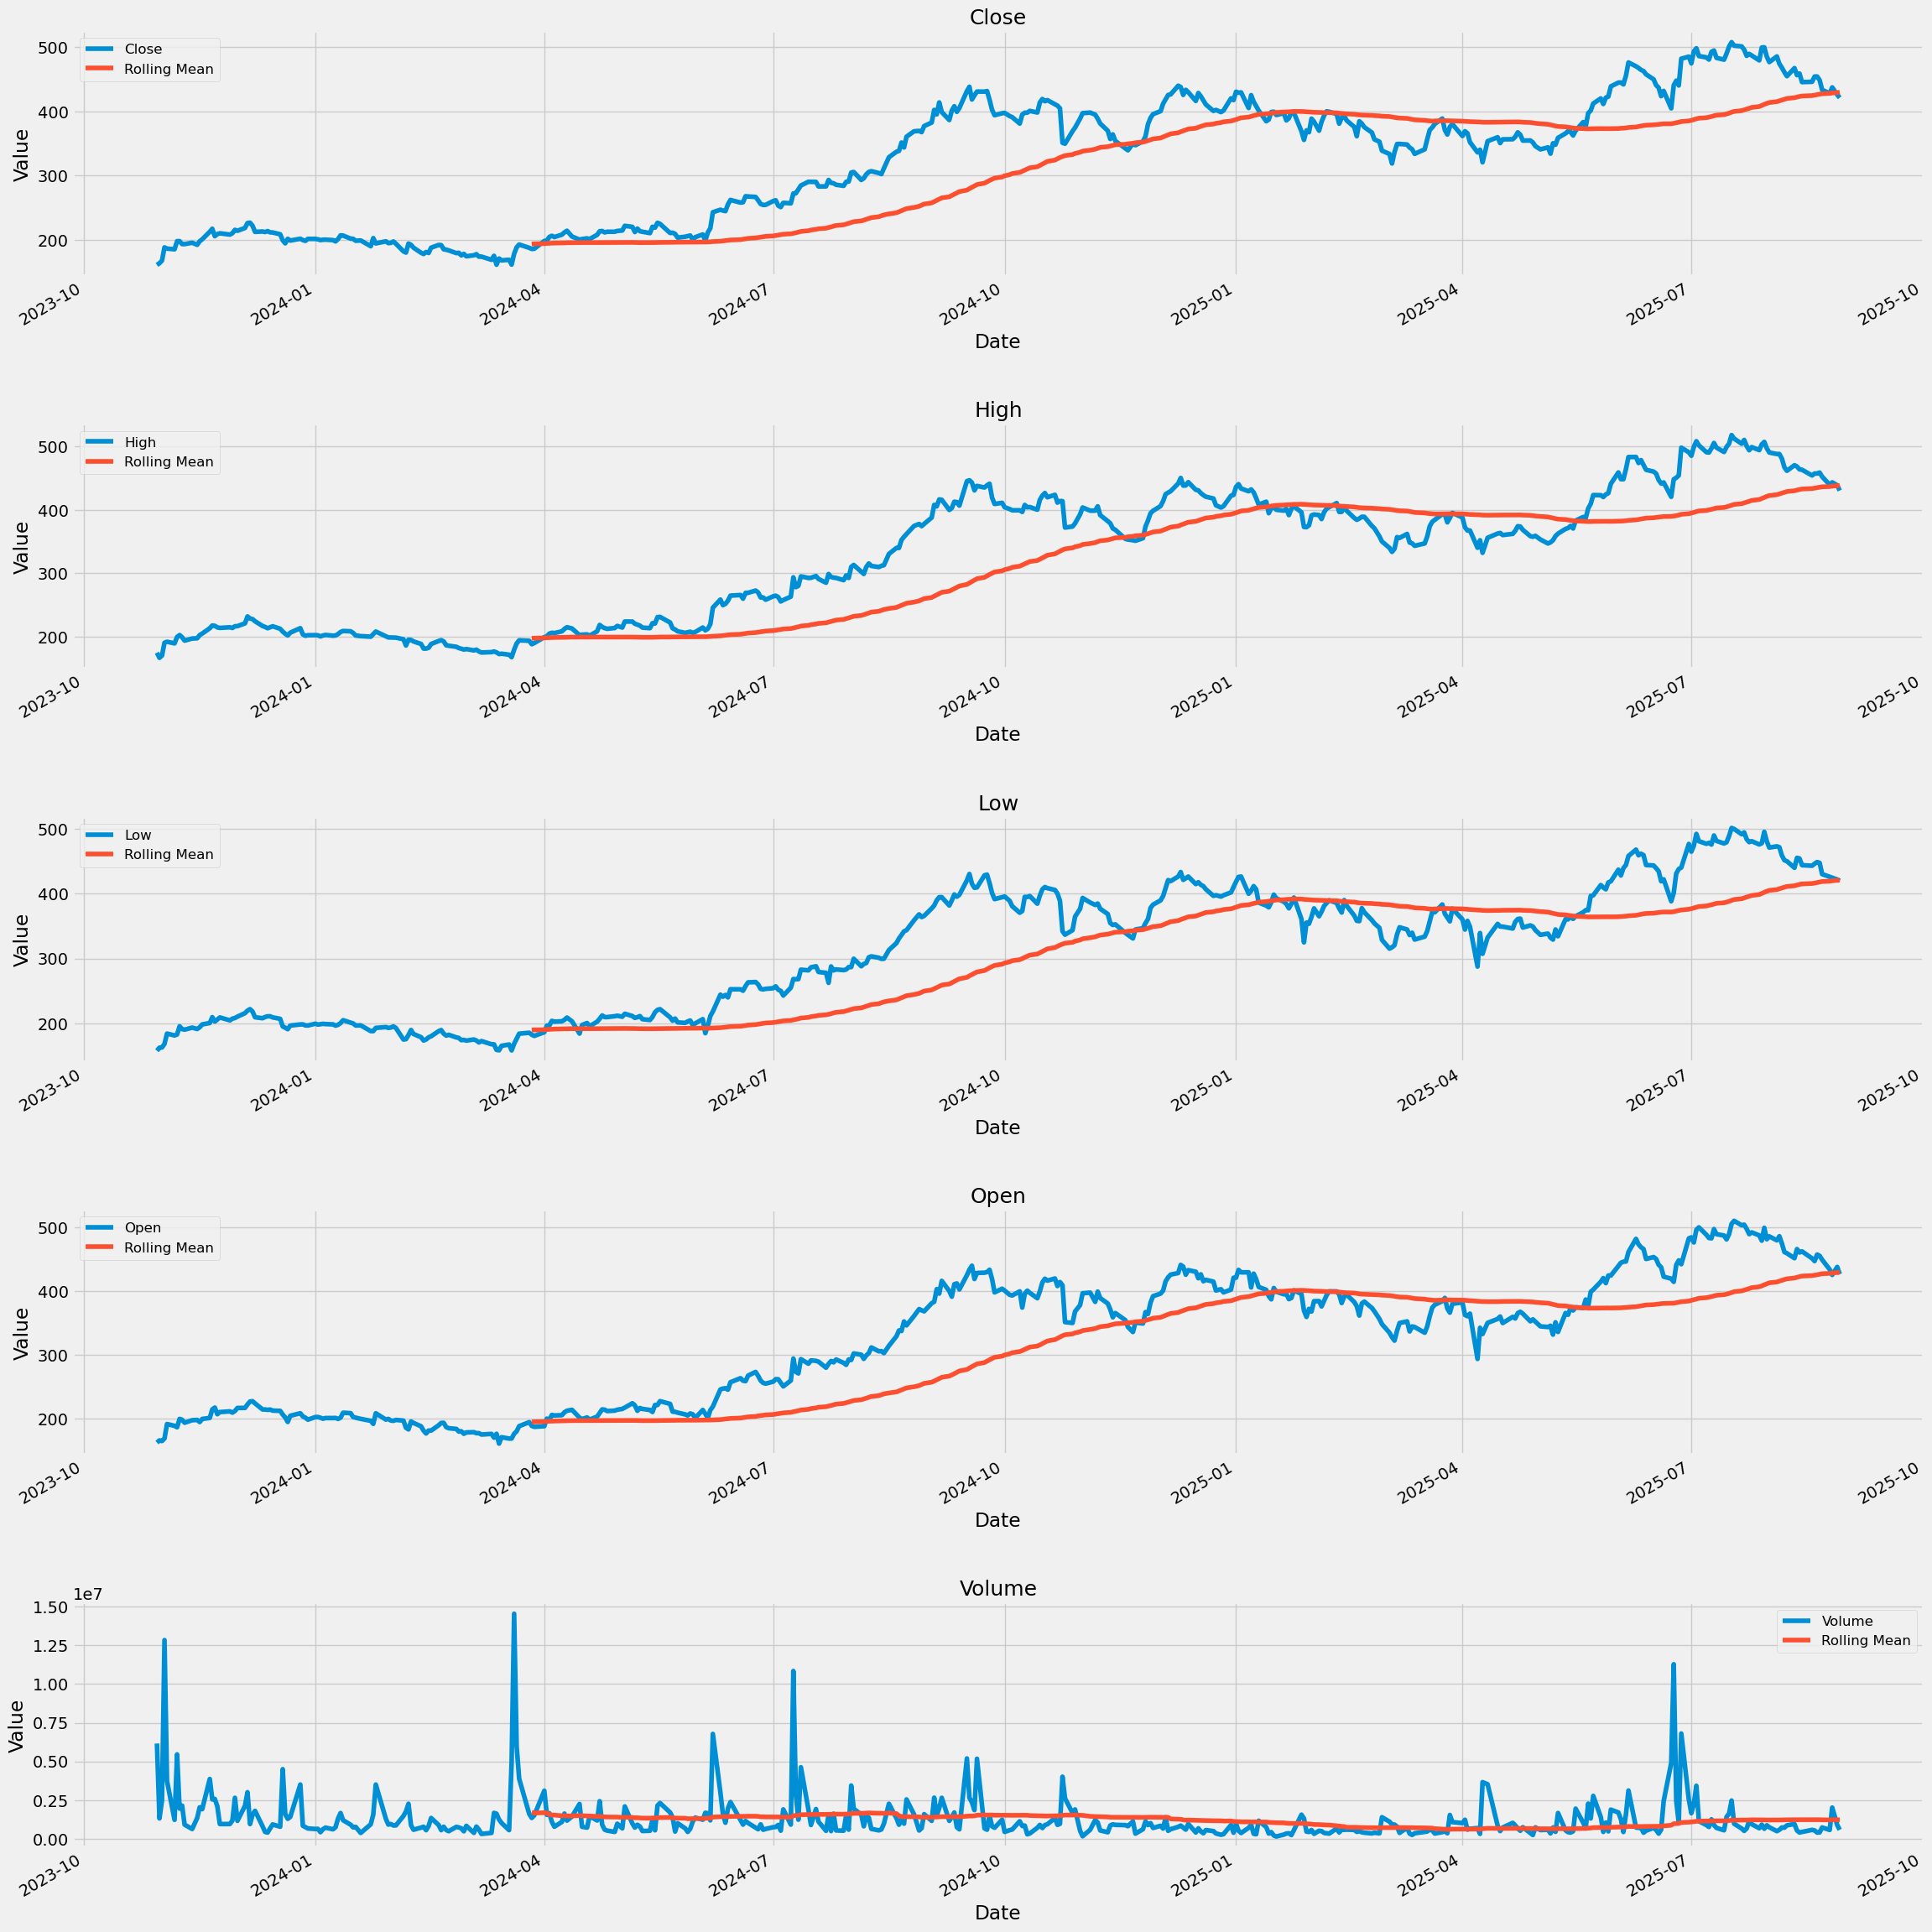

In [20]:
## Visulalization 

col_names = df.columns.drop("Date")   # only numeric columns

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(24, 24))

for i, col in enumerate(col_names, start=1):
    ax = fig.add_subplot(len(col_names), 1, i)
    ax.plot(df["Date"], df[col], label=col)
    df[col].rolling(100).mean().plot(ax=ax, label="Rolling Mean")
    ax.set_title(col, fontsize=18)
    ax.set_xlabel("Date")
    ax.set_ylabel("Value")
    ax.patch.set_edgecolor("black")
    ax.legend(prop={"size": 12})

fig.tight_layout(pad=3.0)
plt.show()


## Feature Selection 

We can eliminate features like Open,Low, High Close automatically as they are high multicollinear with Close .

We consider Close as our target variables as it accounts for all corporate decisions like stock split and dividents.

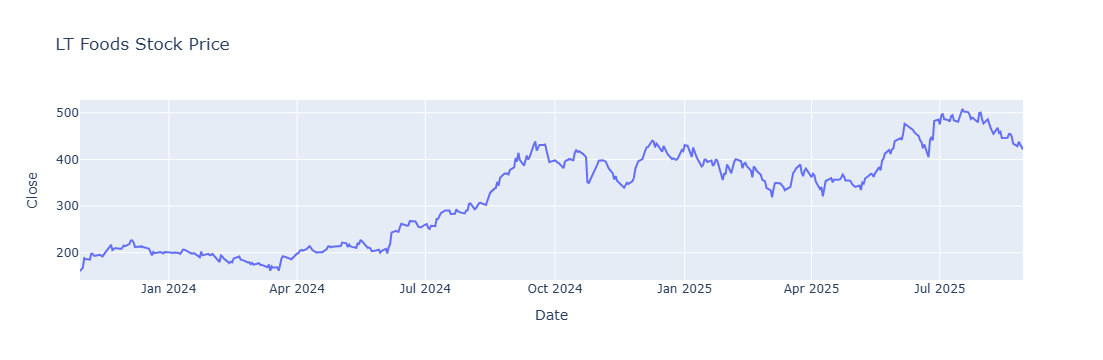

In [21]:
#plot the data to see how it looks like using plotly
fig = px.line(df, x='Date', y='Close', title='LT Foods Stock Price')
fig.show()

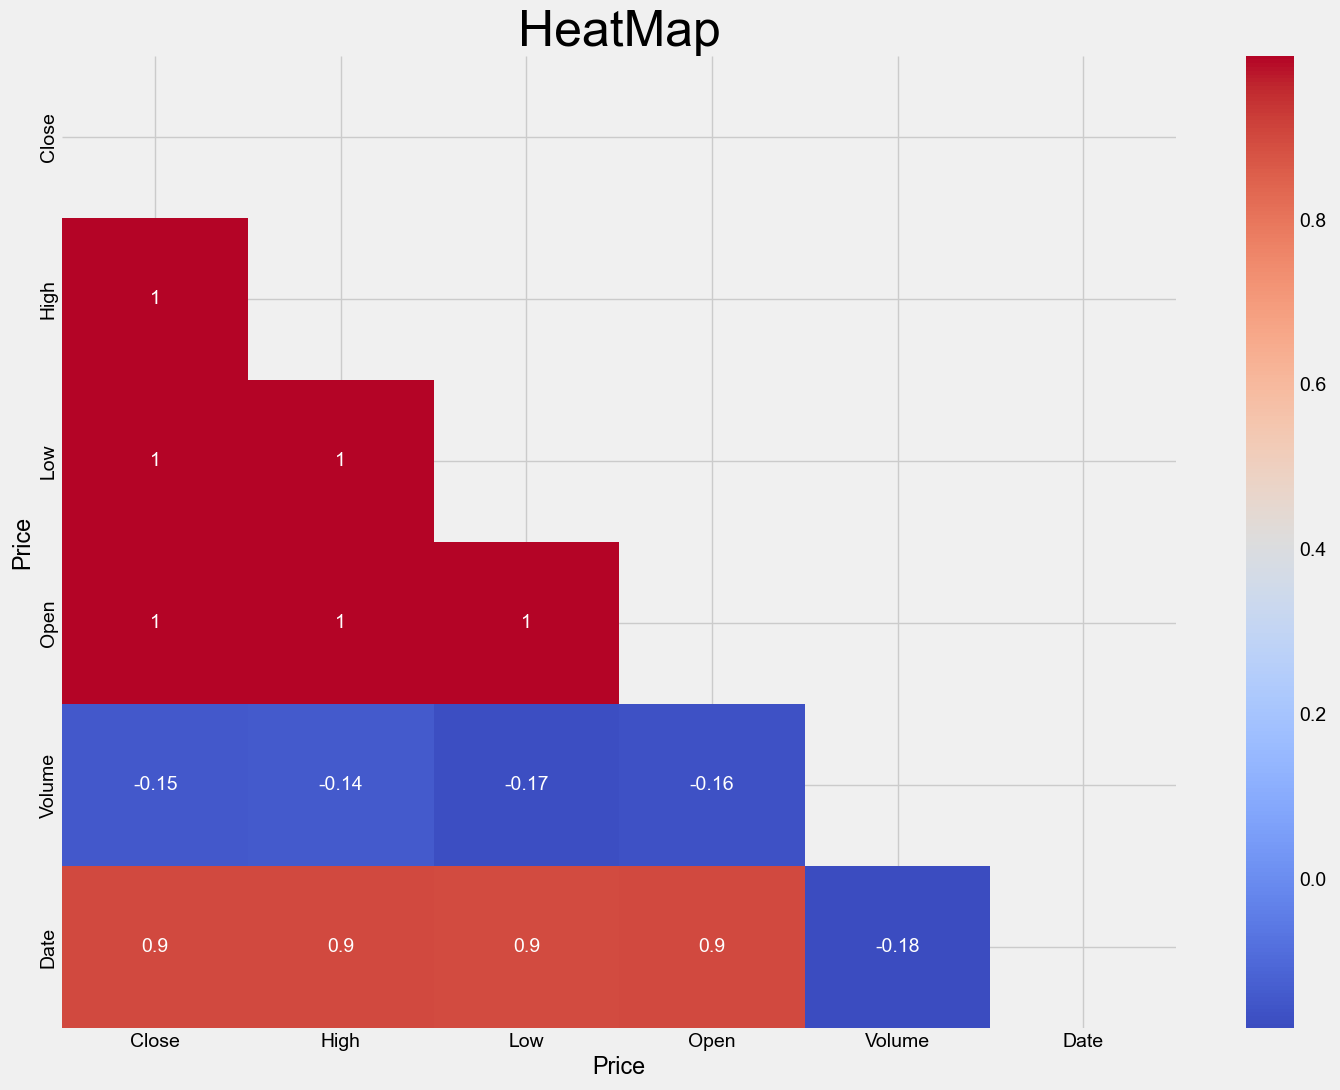

In [22]:
## Heatmap to verify multicollinearity between features
fig = plt.figure(figsize = (16,12))
matrix = np.triu(df.corr())
ax=sns.heatmap(df.corr(), annot = True, annot_kws = {'size':14}, mask=matrix,cmap='coolwarm')
ax.tick_params(labelsize=14)
sns.set(font_scale=3)
ax.set_title('HeatMap')
plt.style.use('fivethirtyeight')
plt.show()

In [27]:
## Data After feature selection
data_feature_selected = df.drop(axis=1, labels=['Open','High','Low','Volume'])
data_feature_selected.head()

Price            Close       Date
Date                             
2023-10-30  160.617203 2023-10-30
2023-10-31  163.340363 2023-10-31
2023-11-01  167.400345 2023-11-01
2023-11-02  187.997391 2023-11-02
2023-11-03  186.115906 2023-11-03

In [28]:
col_order = ['Date','Close']
data_feature_selected = data_feature_selected.reindex(columns=col_order)
data_feature_selected

Price            Date       Close
Date                             
2023-10-30 2023-10-30  160.617203
2023-10-31 2023-10-31  163.340363
2023-11-01 2023-11-01  167.400345
2023-11-02 2023-11-02  187.997391
2023-11-03 2023-11-03  186.115906
...               ...         ...
2025-08-22 2025-08-22  433.600006
2025-08-25 2025-08-25  428.250000
2025-08-26 2025-08-26  437.549988
2025-08-28 2025-08-28  426.100006
2025-08-29 2025-08-29  421.350006

[449 rows x 2 columns]

## Resampling

In [29]:
## Resample Data to monthly instead of daily by Aggregating Using Mean
monthly_mean=data_feature_selected['Close'].resample('M').mean()

In [30]:
monthly_data = monthly_mean.to_frame()
monthly_data

Close
Date                  
2023-10-31  161.978783
2023-11-30  199.043526
2023-12-31  209.084577
2024-01-31  199.300988
2024-02-29  184.731941
2024-03-31  175.806403
2024-04-30  206.886243
2024-05-31  212.639223
2024-06-30  246.113698
2024-07-31  277.485068
2024-08-31  328.749916
2024-09-30  410.181542
2024-10-31  394.231329
2024-11-30  370.267436
2024-12-31  418.562613
2025-01-31  397.034700
2025-02-28  378.531799
2025-03-31  355.738251
2025-04-30  353.760747
2025-05-31  380.879697
2025-06-30  451.137355
2025-07-31  491.264116
2025-08-31  452.707897

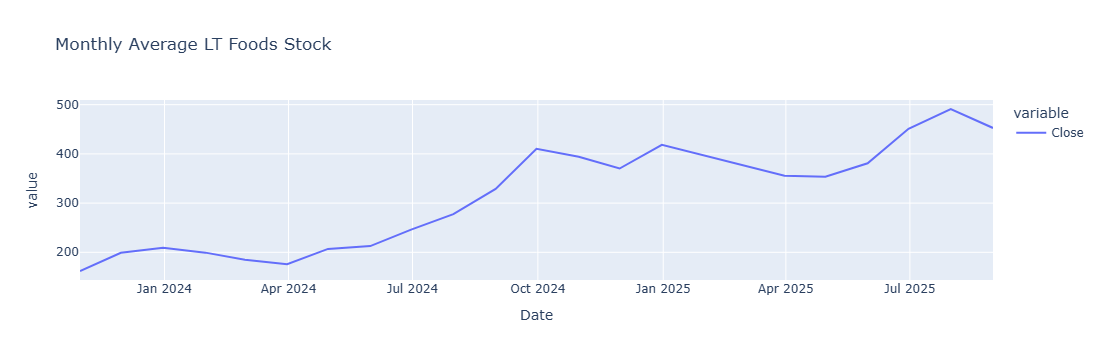

In [31]:
## monthly stock Price
fig = px.line(monthly_data['Close'], title='Monthly Average LT Foods Stock')
fig.show()

## Exploratory Data Analysis

In [32]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['dayofweek'] = monthly_data.index.strftime('%A')
monthly_data['quarter'] = monthly_data.index.quarter
monthly_data

Close  Year      Month  dayofweek  quarter
Date                                                       
2023-10-31  161.978783  2023    October    Tuesday        4
2023-11-30  199.043526  2023   November   Thursday        4
2023-12-31  209.084577  2023   December     Sunday        4
2024-01-31  199.300988  2024    January  Wednesday        1
2024-02-29  184.731941  2024   February   Thursday        1
2024-03-31  175.806403  2024      March     Sunday        1
2024-04-30  206.886243  2024      April    Tuesday        2
2024-05-31  212.639223  2024        May     Friday        2
2024-06-30  246.113698  2024       June     Sunday        2
2024-07-31  277.485068  2024       July  Wednesday        3
2024-08-31  328.749916  2024     August   Saturday        3
2024-09-30  410.181542  2024  September     Monday        3
2024-10-31  394.231329  2024    October   Thursday        4
2024-11-30  370.267436  2024   November   Saturday        4
2024-12-31  418.562613  2024   December    Tuesday        4
2025-01-31  397.034700  2025    January     Friday        1
2025-02-28  378.531799  2025   February     Friday        1
2025-03-31  355.738251  2025      March     Monday        1
2025-04-30  353.760747  2025      April  Wednesday        2
2025-05-31  380.879697  2025        May   Saturday        2
2025-06-30  451.137355  2025       June     Monday        2
2025-07-31  491.264116  2025       July   Thursday        3
2025-08-31  452.707897  2025     August     Sunday        3

(array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
        0.004 ]),
 [Text(0, 0.0, '0.0000'),
  Text(0, 0.0005, '0.0005'),
  Text(0, 0.001, '0.0010'),
  Text(0, 0.0015, '0.0015'),
  Text(0, 0.002, '0.0020'),
  Text(0, 0.0025, '0.0025'),
  Text(0, 0.003, '0.0030'),
  Text(0, 0.0035, '0.0035'),
  Text(0, 0.004, '0.0040')])

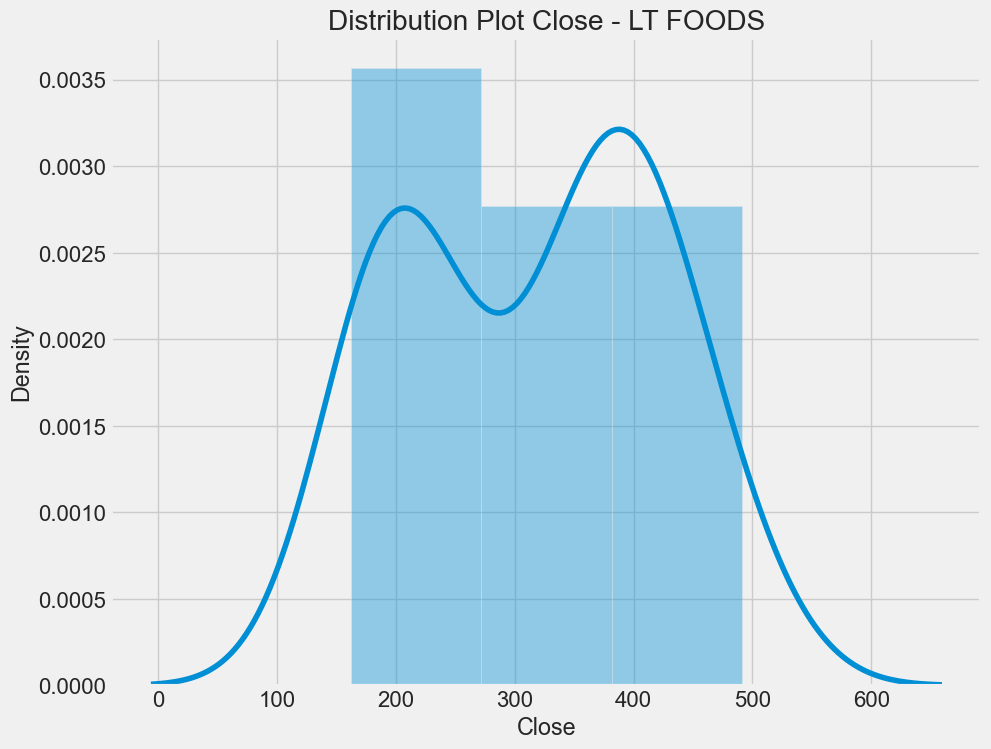

In [33]:
## Checking Distribution of our Data

fig = plt.figure(figsize=(10,8))
sns.distplot(monthly_data['Close']).set_title("Distribution Plot Close - LT FOODS")
ax.tick_params(labelsize=12)
sns.set(font_scale=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

        The plot shows that LT FOODS closing prices cluster around two major price levels (200–250 and 350–400), with fewer observations outside this rang

    LT FOODS stock closing prices are not normally distributed; they are bimodal.
    
    The stock historically traded in two major ranges: one around 200–250 and another around 350–400.
    
    The average (mean) closing price lies in the 280–320 range, but because of right skewness, occasional higher values (500+) pull the mean slightly upward.
    
    This kind of distribution often happens in stocks that went through structural price shifts (e.g., before and after a growth rally, or market revaluation)

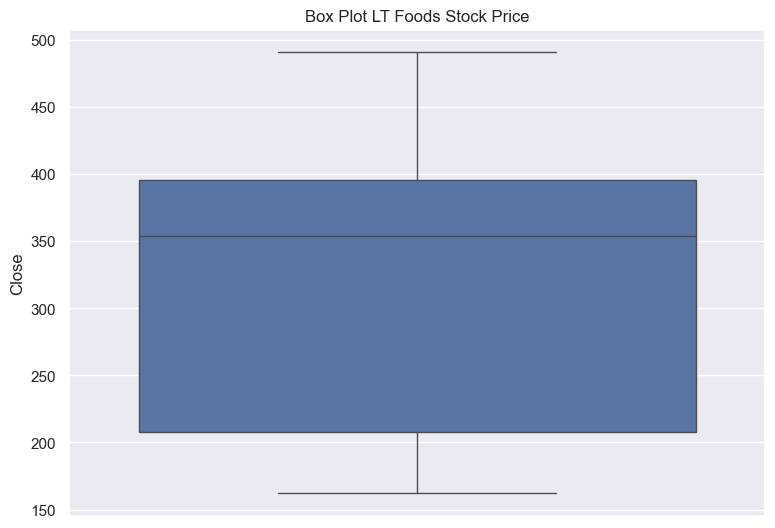

In [34]:
fig=plt.figure(figsize=(8,6))
sns.boxplot(monthly_data['Close']).set_title('Box Plot LT Foods Stock Price')
plt.style.context('fivethirtyeight')

### Key Takeaways

**Median Close Price:** ~355

**Most Common Range (IQR):** 210 – 395 (50% of trading days fell in this range)

**Overall Range:** 165 – 495

**Skewness:** Slightly left-skewed, meaning more clustering at lower prices (200–250).

**Volatility:** High, as seen by the wide IQR and large range.

Text(0.5, 1.0, 'QQ Plot LT Foods Stock')

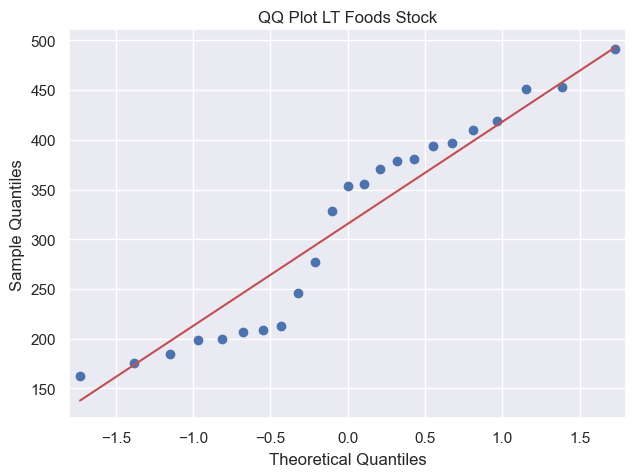

In [36]:
qq_plot = qq(monthly_data['Close'], line = 's')
plt.title('QQ Plot LT Foods Stock')

### QQ Plot Interpretation (LT Foods Stock Price)

**Purpose of QQ Plot:**

- A QQ plot compares the distribution of sample data (closing prices) with a theoretical normal distribution.

- If the points lie on the 45° reference line (red line), the data is approximately normally distributed.

**What we see in this plot:**

- **Middle values (~200–400):** Points closely follow the red line → this suggests the central portion of the data is fairly normal-like.

- **Lower tail (<200):** Points deviate below the line → indicates heavier left tail (more low-price occurrences than a normal distribution would predict).

- **Upper tail (>450):** Points deviate above the line → indicates heavier right tail (more high-price occurrences than expected under normality).

**Skewness Insight:**

- The curvature at the tails suggests slight positive skewness (right skew).

- **Meaning:** while the bulk of the prices are normal-like, the distribution has more extreme high values.

**Normality Test (Visual):**

- Since the points deviate in the tails but mostly align in the middle, LT Foods stock prices do not perfectly follow a normal distribution.

- Instead, they show fat tails (kurtosis > normal) and slight skewness.

In [38]:
print('Skewness of Distribution is ',monthly_data['Close'].skew())
print('Kurtosis of Distribution is ',monthly_data['Close'].kurtosis())

Skewness of Distribution is  -0.05948983919826135
Kurtosis of Distribution is  -1.5011404601890301


- **Skewness (-0.059) :** The distribution is almost symmetric, no significant skew.

- **Kurtosis (-1.50) :** The distribution is flatter and lighter-tailed than a normal distribution, meaning low probability of extreme values/outliers.

- This matches what we saw in the box plot and QQ plot: the stock closes are spread across two main ranges, with less extreme variation than typical financial data.

Text(0.5, 1.0, 'Box Plots Year Wise-LT Foods Stock PRice')

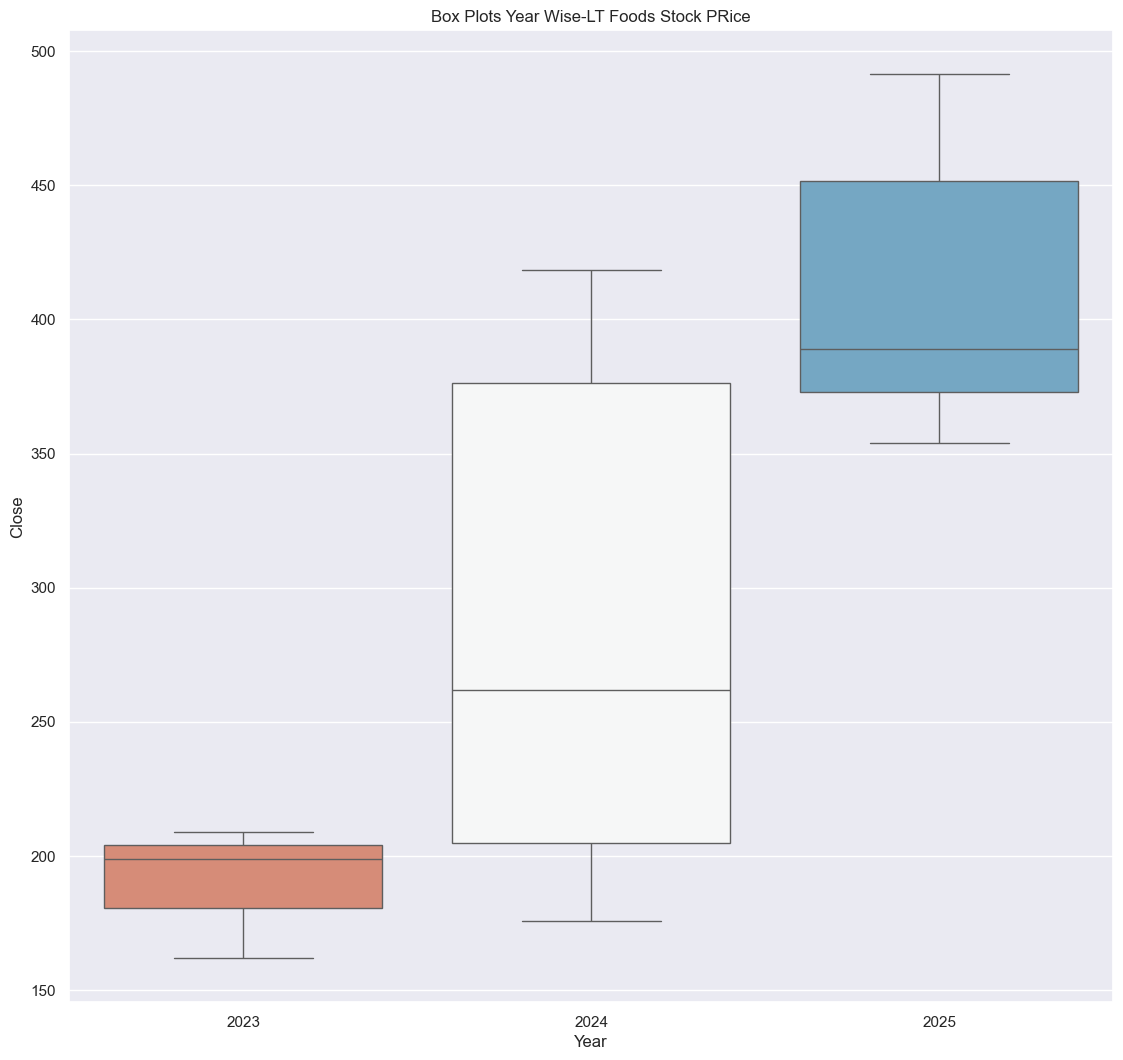

In [39]:
plt.figure(figsize=(12,12))
ax=sns.boxplot(x=monthly_data['Year'],y=monthly_data['Close'],palette='RdBu')
ax.set_title('Box Plots Year Wise-LT Foods Stock PRice')

- **Upward Trend:** Median price rose from 200 (2023) → 260 (2024) → 385 (2025).

- **Volatility Shift:**

- **2023:** Low volatility (stable low prices).

- **2024:** Very high volatility (big swings, rally phase).

- **2025:** Higher prices, but more stable (consolidation).

- **Investor Implication:** LT Foods stock went through a growth phase in 2024, followed by stabilization at higher levels in 2025.

In [41]:
group_by_yr = []
list_years = monthly_data['Year'].unique()
dict_IQR = {}

for yr in list_years:
    # filter rows for each year
    df_year = monthly_data[monthly_data['Year'] == yr]['Close']
    group_by_yr.append(df_year)

    # compute IQR of 'Close' for this year
    dict_IQR[str(yr)] = stats.iqr(df_year)

print(dict_IQR)


{'2023': 23.552897262573225, '2024': 171.268479465303, '2025': 78.69657852058123}


Text(0, 0.5, 'InterQuartile Range')

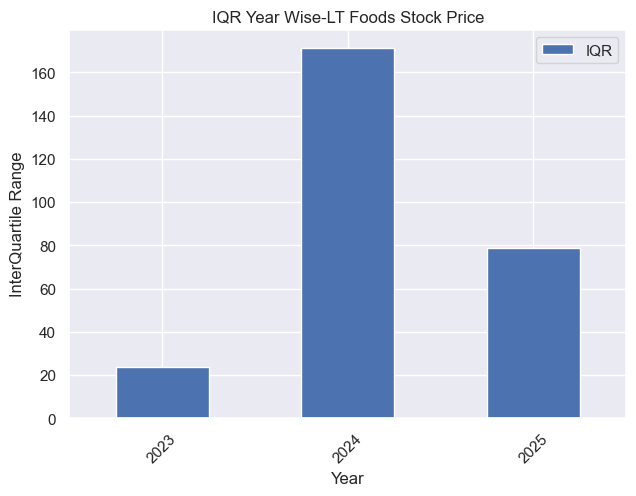

In [42]:
IQR_df = pd.DataFrame(dict_IQR.items(), columns=['Year','IQR'])
IQR_df.index = IQR_df['Year']
IQR_df.plot(kind='bar')
plt.xticks(rotation=45)
plt.style.context('fivethirtyeight')
plt.title('IQR Year Wise-LT Foods Stock Price')
plt.ylabel('InterQuartile Range')        

- When Data is Not Normal Inter-Quartile Range(IQR) is Better Variability Metric than Standard Deviation as IQR is not affected by outliers.

- **2023:** Low IQR → Stable stock, limited movement.

- **2024:** Highest IQR → Period of extreme volatility and price swings.

- **2025:** Moderate IQR → Stock stabilized at higher levels but with some volatility.

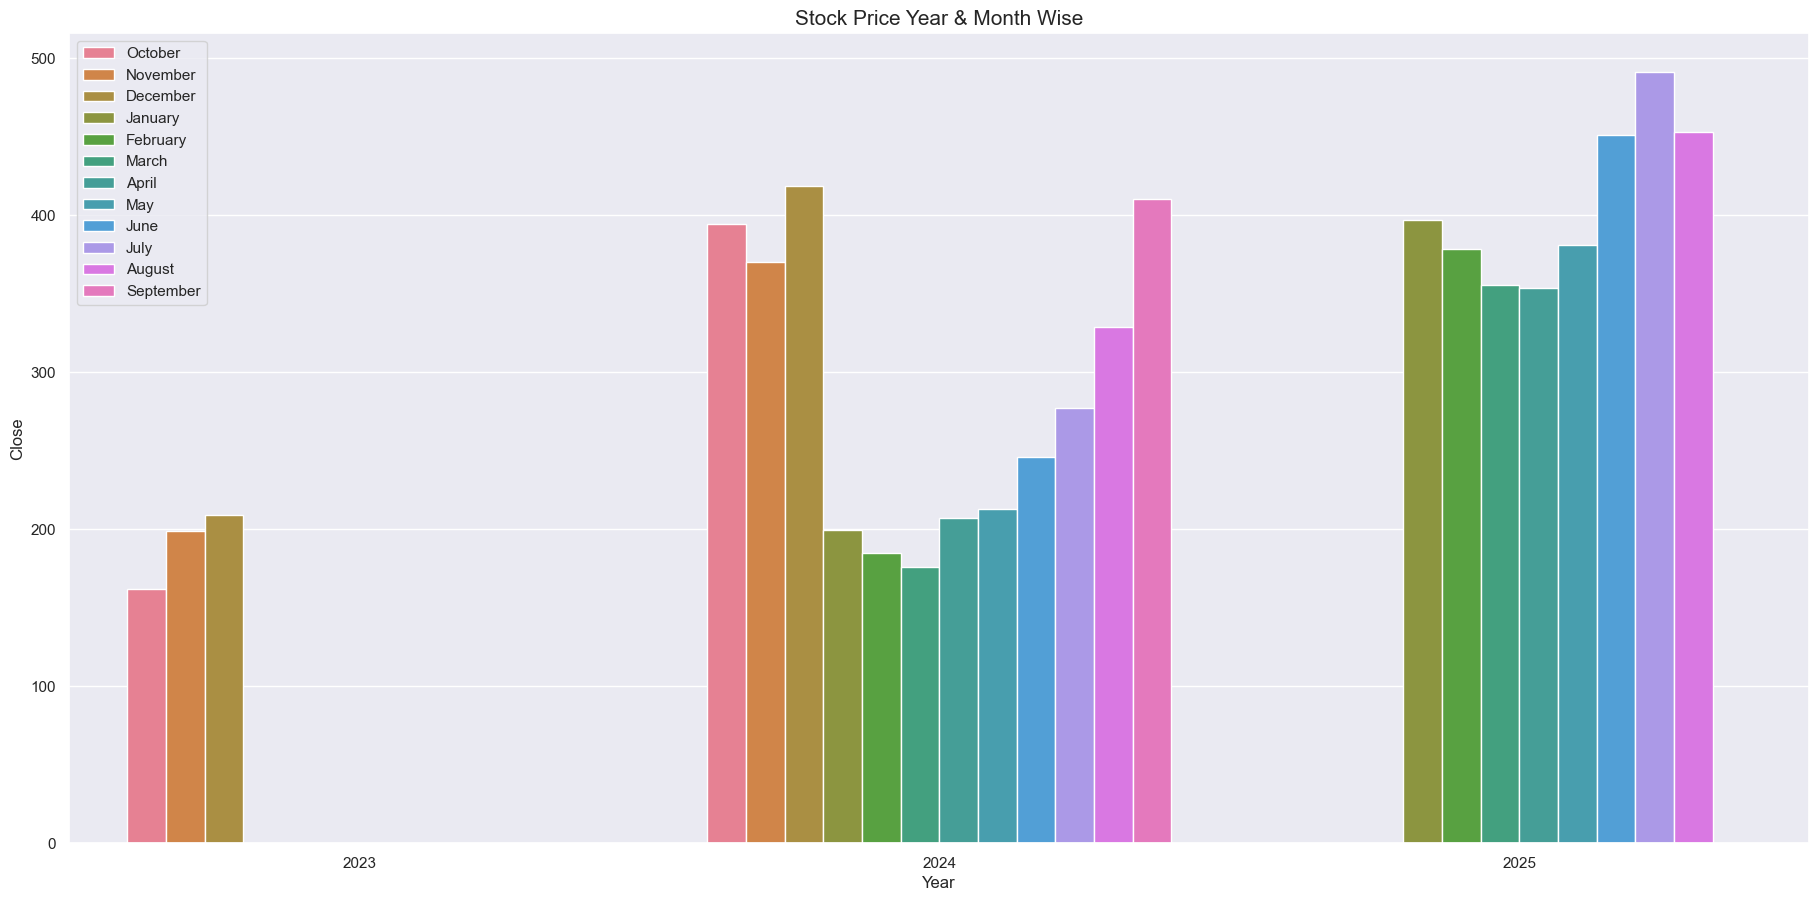

In [47]:
fig,ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x='Year',y='Close',hue='Month',data=monthly_data)
a.set_title("Stock Price Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

**Growth Trend:**

- **Median prices increased year-over-year:**

- **2023:** ~200

- **2024:** ~260 (but very volatile)

- **2025:** ~400+ (higher and more stable).

**Volatility Dynamics:**

- **2023** → Low volatility.

- **2024** → Highest volatility (biggest month-to-month swings).

- **2025** → Moderate volatility but at much higher price levels.

**Investor/Market Insight:**

- LT Foods stock likely experienced a rally in 2024 and entered a strong consolidation phase in 2025.

- The month-wise rise within 2024 and 2025 suggests sustained bullish momentum rather than short-lived spikes.

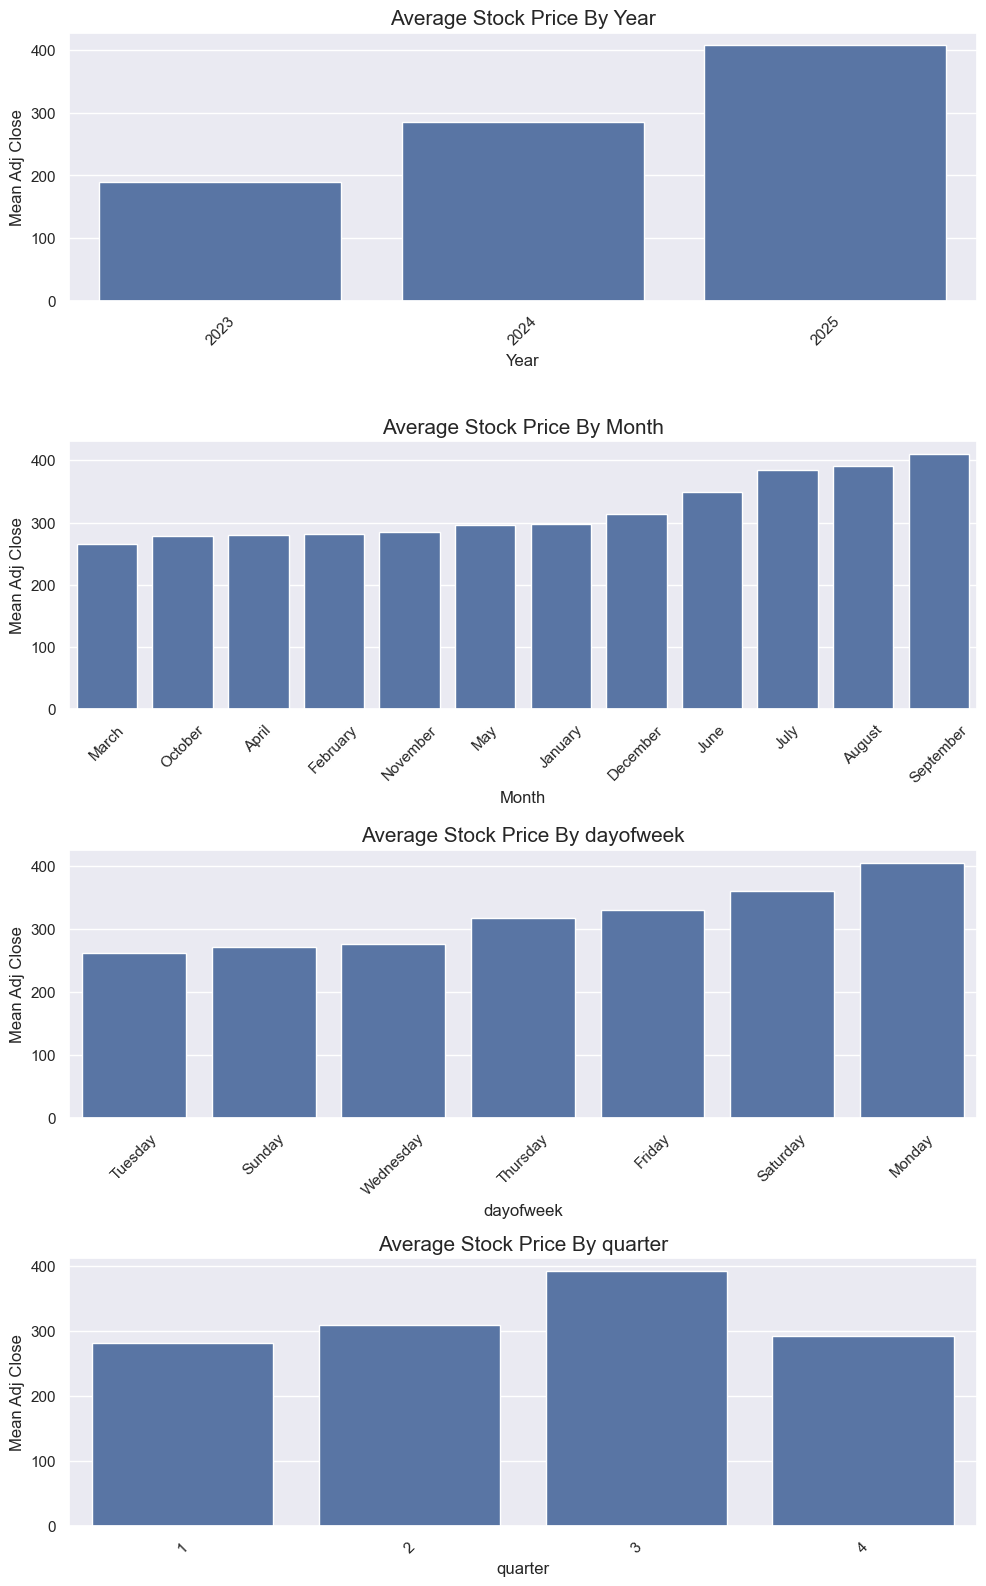

In [49]:
fig = plt.figure(figsize=(10,16))
fig.set_size_inches(10,16)
group_cols = monthly_data.columns

for enum,i in enumerate(group_cols[1:]):
  ax = fig.add_subplot(4,1,enum+1)
  Aggregated = pd.DataFrame(monthly_data.groupby(str(i))["Close"].mean()).reset_index().sort_values('Close')
  sns.barplot(data=Aggregated,x=str(i),y="Close",ax=ax)
  ax.set(xlabel=str(i), ylabel='Mean Adj Close')
  ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
  plt.xticks(rotation=45)
  
plt.tight_layout(pad=1)

This set of plots highlights both the long-term growth trend (2023 → 2025) and short-term seasonality patterns in LT Foods stock. The stock is strongest in Q3 (Aug–Sep) and tends to perform better at the start of the week (Monday), indicating investor optimism during those periods.

## Decomposition of Time Series

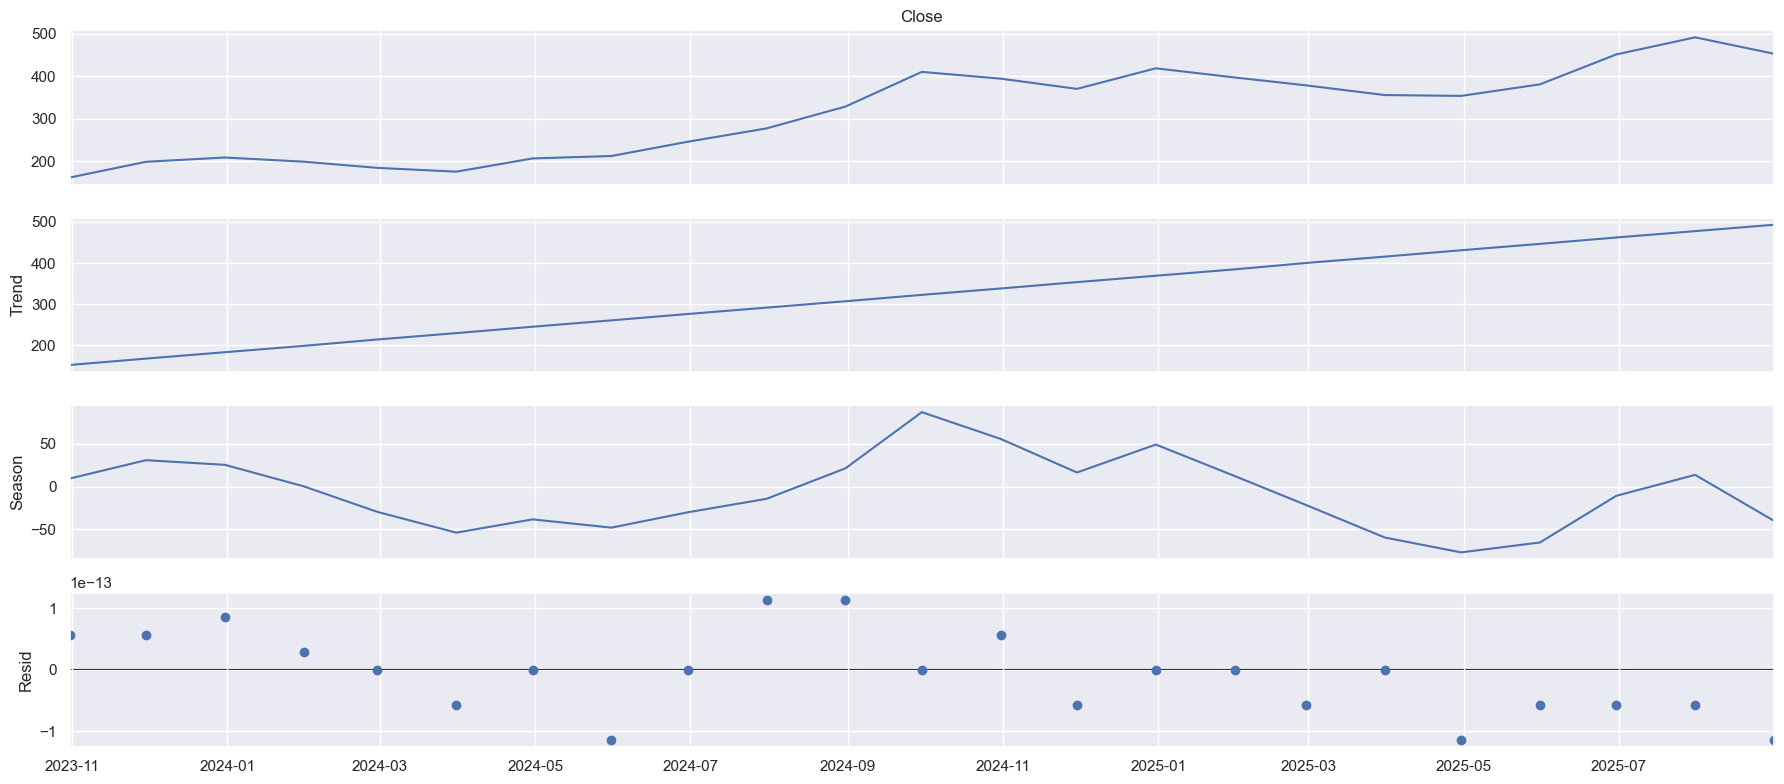

In [53]:
from statsmodels.tsa.seasonal import STL

stl = STL(monthly_data['Close'], period=12)
result = stl.fit()
result.plot()
plt.show()


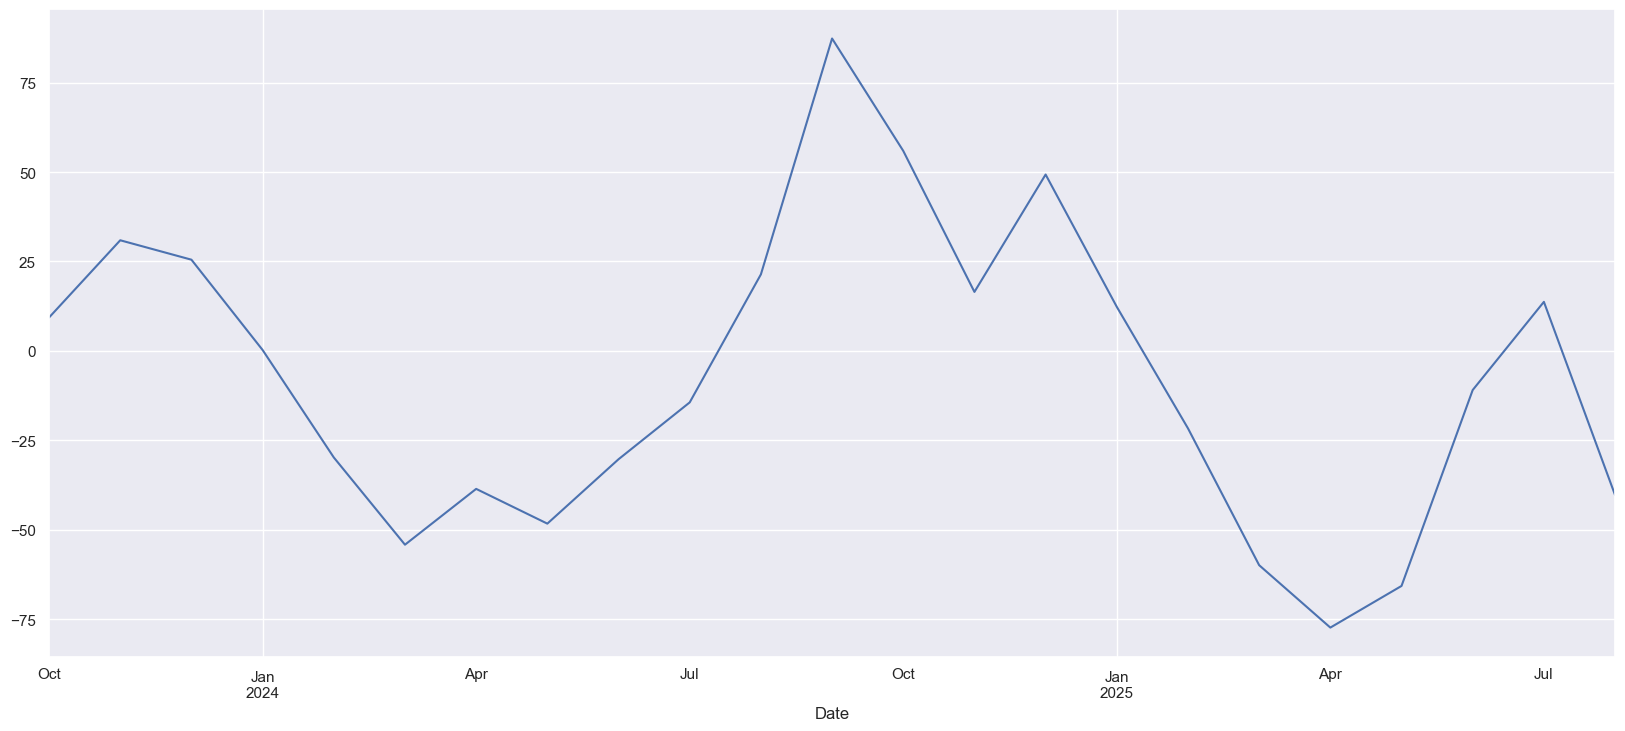

<Figure size 800x800 with 0 Axes>

In [60]:
## Drilling Down and oberving seasonality
result.seasonal['2023':'2025'].plot()
fig=plt.figure(figsize=(8,8))

- **Trend:** Strong, steady upward movement → LT Foods stock is in a long-term bullish phase.

- **Seasonality:** Repeating yearly cycle → prices typically dip in early year (Mar–May) and peak in late year (Sep–Nov).

- **Residuals:** Very small → stock prices are well explained by trend and seasonality, little unexplained randomness.

## Stationarity of Time Series

**Stationarity Test of Time Series**

Using Augmented Dickey-Fuller(ADF) Test

- **Null Hypothesis :** Time series has a unit root -It is non-stationary

- **Alternate Hypothesis :** Time series does not have a unit root -It is stationary

Time Series is Stationary if we have constant mean,constant variance and No Trend and Seasonality.

In [124]:
def ad_fuller_func(X):
  result_ad_fuller = adfuller(X)
  print('ADF Statistic: %f' % result_ad_fuller[0])
  print('p-value: %f' %result_ad_fuller[1])
  print('Critical Values:')
  for key, value in result_ad_fuller[4].items():
	  print('\t%s: %.3f' % (key, value))
 
  if result_ad_fuller[1] < result_ad_fuller[4]['5%']:
    print('Reject Null Hypothesis(Ho)-Time Series is Stationary')
  else:
    print('Failed to Reject Ho-Time Series is Non-Stationary')

In [125]:
ad_fuller_func(monthly_data['Close'])

ADF Statistic: -3.602857
p-value: 0.005707
Critical Values:
	1%: -4.069
	5%: -3.127
	10%: -2.702
Failed to Reject Ho-Time Series is Non-Stationary


Time Series is Not Stationary as observed earlier also by Decomposition(Trend and Seasonality Present)

Statistically verified by ADF Test

AutoCorrelation Function(ACF)

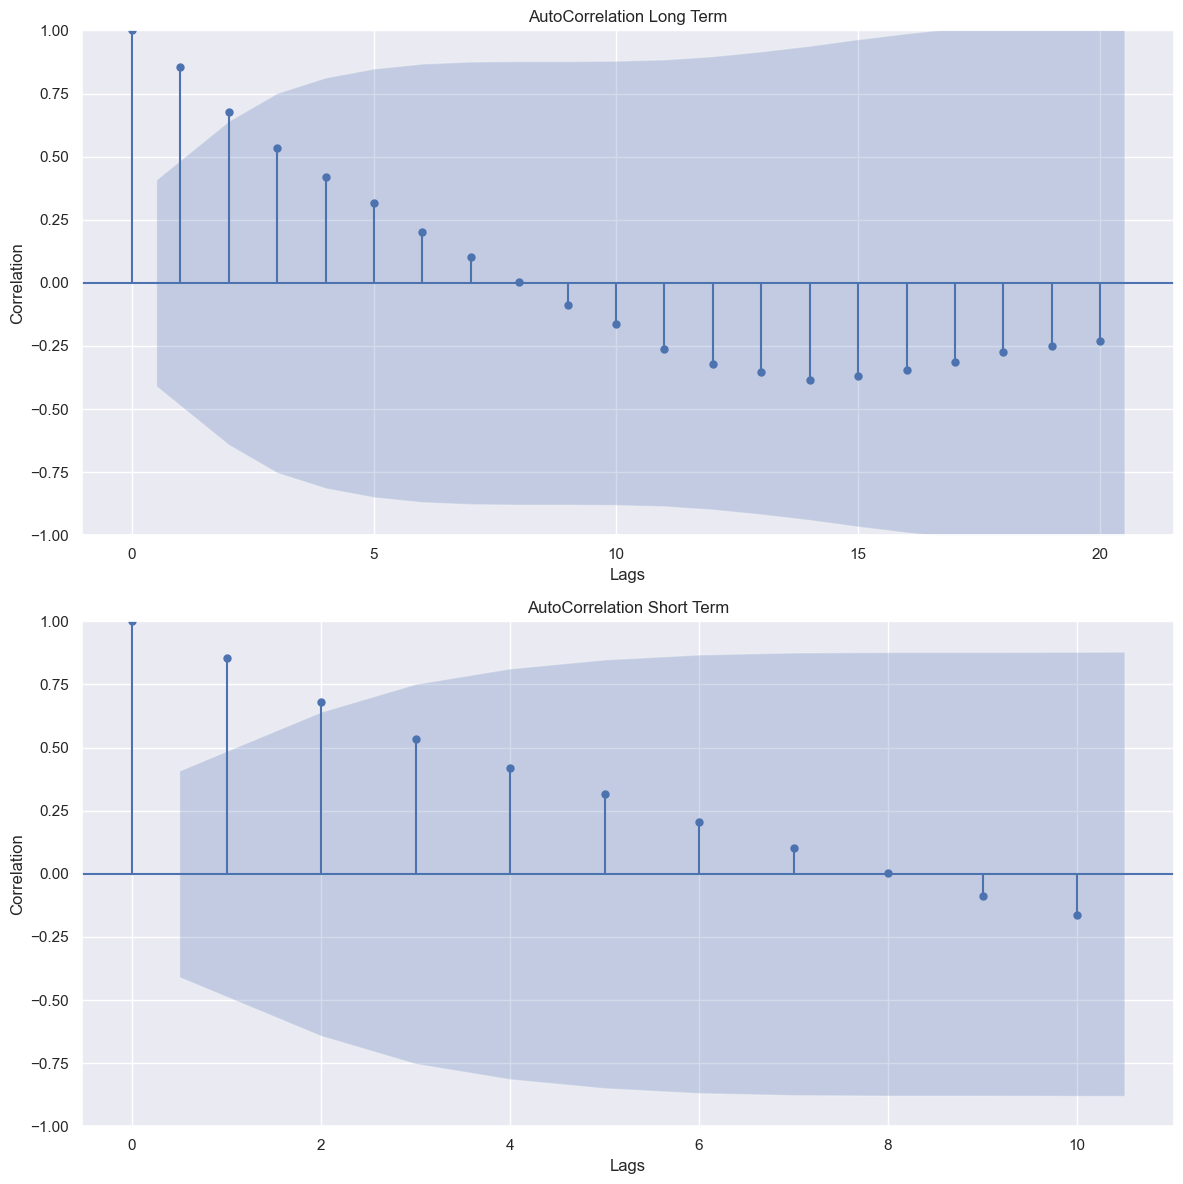

In [126]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,12))
acf = plot_acf(monthly_data['Close'],lags=20,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(monthly_data['Close'],lags=10,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout()
plt.show()

The ACF plot shows the autocorrelation between the time series and its past values at various lags. Significant autocorrelations (outside the shaded area) can help determine the order of the AR (AutoRegressive) or MA (Moving Average) model. The MA order is identified by finding significant correlations at specific lags and observing when the autocorrelation cuts off. If you observe a rapid drop-off after a few lags, it's likely an MA process, and the number of significant lags indicates the order q.

- Based on the ACF plot, the MA(q) value is 2 because the autocorrelation is significant at lag 1 and lag 2, but not beyond these lags. Therefore, the time series appears to follow a Moving Average process of order 2, i.e., MA(2).

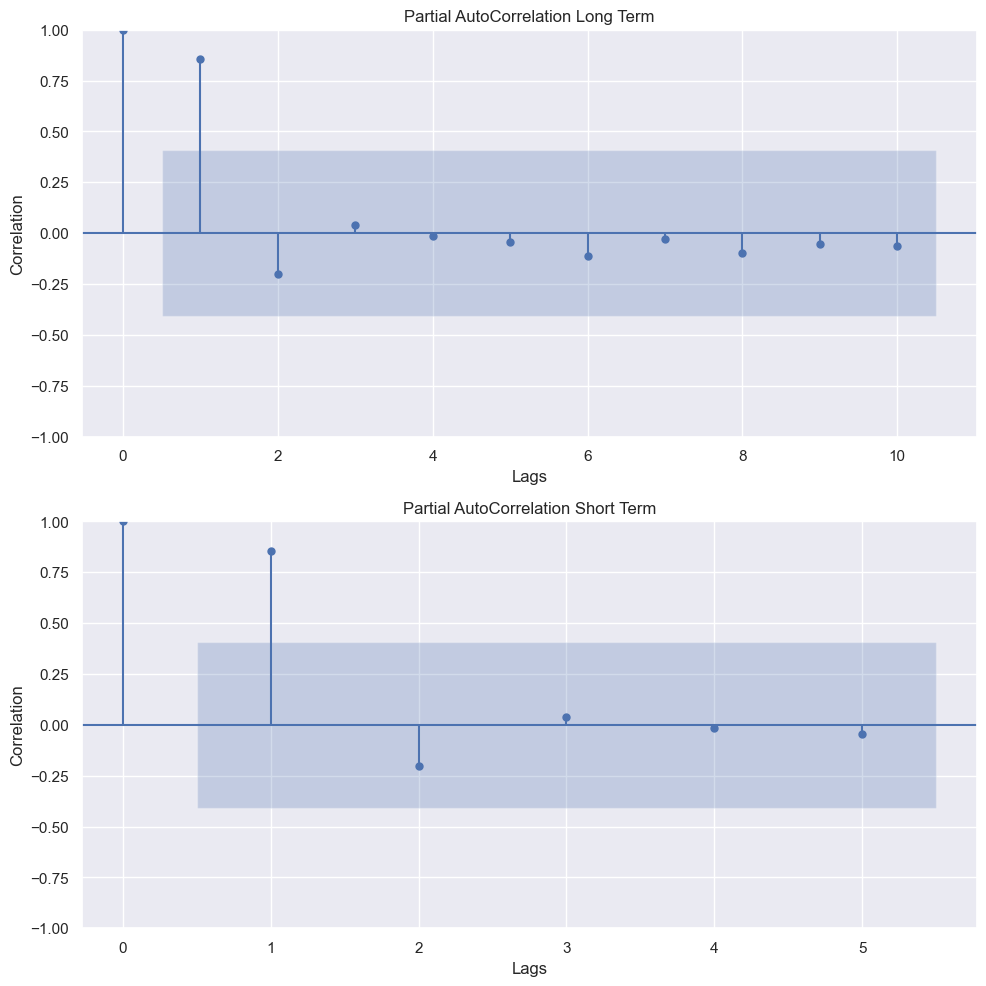

In [127]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
pacf = plot_pacf(monthly_data['Close'],lags=10,ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
pacf = plot_pacf(monthly_data['Close'],lags=5,ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)
plt.show()

- PACF shows how much of the correlation at a lag is direct (not explained by earlier lags).

In this case:

- Significant lags = 1 and 2.

- Cutoff after lag 2 → indicates AR(2) model candidate.

So p=2

### Transformations To Make Series Stationary

In [128]:
## Differencing by 1
monthly_diff = monthly_data['Close']-monthly_data['Close'].shift(1)

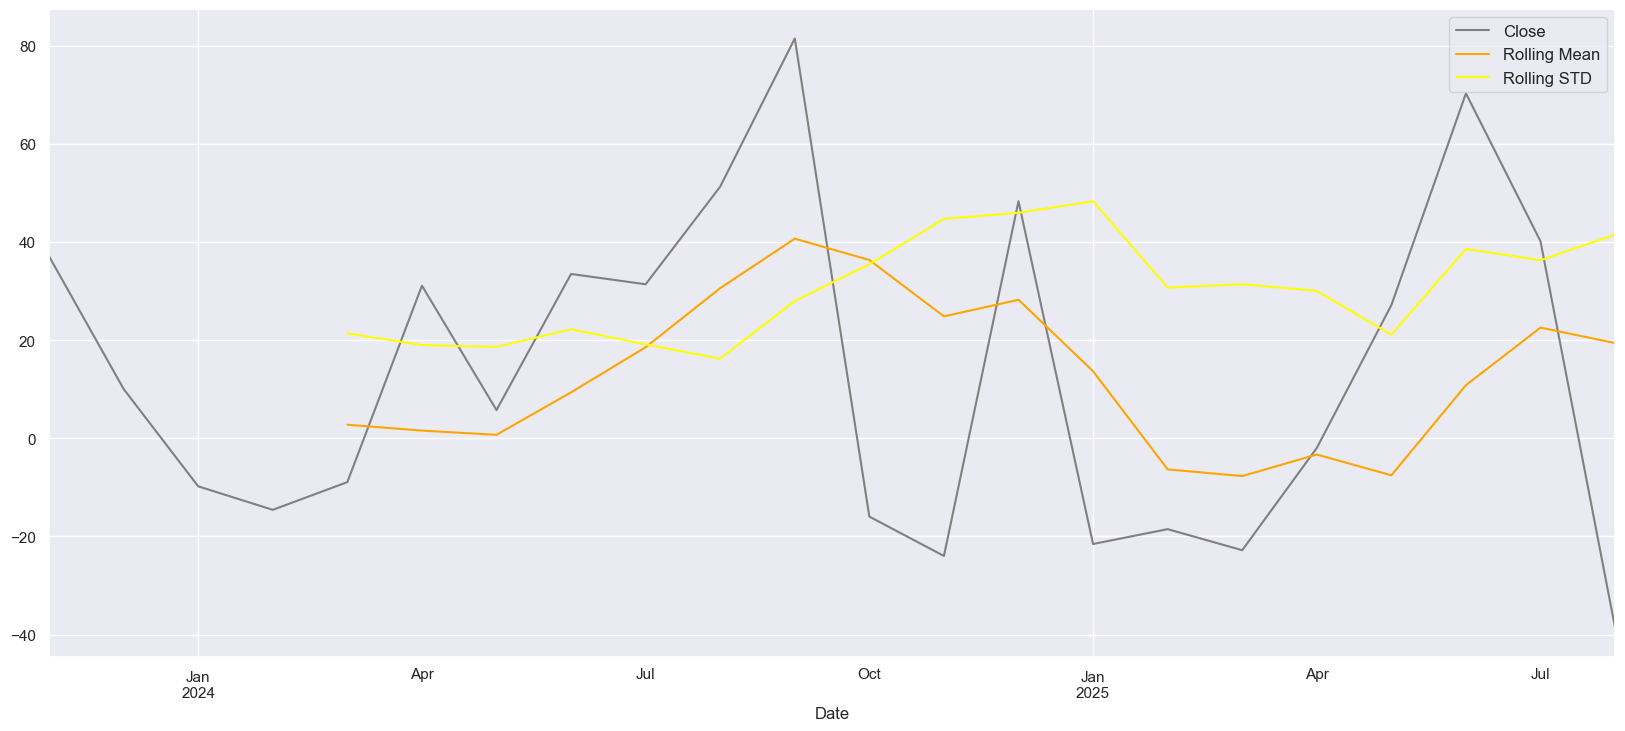

In [129]:
monthly_diff[1:].plot(c='grey')
monthly_diff[1:].rolling(5).mean().plot(label='Rolling Mean', c='orange')
monthly_diff[1:].rolling(5).std().plot(label='Rolling STD', c='yellow')
plt.legend(prop={'size':12})
plt.show()

- The rolling mean and variance appear stable after differencing → the series looks stationary.
- To be sure, confirm with an ADF test.

In [130]:
def ad_fuller_func2(X):
  result_ad_fuller = adfuller(X)
  print('ADF Statistic: %f' % result_ad_fuller[0])
  print('p-value: %f' %result_ad_fuller[1])
  print('Critical Values:')
  for key, value in result_ad_fuller[4].items():
	  print('\t%s: %.3f' % (key, value))
 
  if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
    print('Reject Null Hypothesis(Ho)-Time Series is Stationary')
  else:
    print('Failed to Reject Ho-Time Series is Non-Stationary')

In [131]:
## Checking if timeseries is Stationary or not by running ADF Test
ad_fuller_func2(monthly_diff[1:])

ADF Statistic: -0.435356
p-value: 0.904026
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714
Failed to Reject Ho-Time Series is Non-Stationary


In [132]:
log_data = np.log(monthly_data['Close'])
ad_fuller_func2(log_data.dropna())

ADF Statistic: -2.017074
p-value: 0.279137
Critical Values:
	1%: -4.069
	5%: -3.127
	10%: -2.702
Failed to Reject Ho-Time Series is Non-Stationary


In [133]:
log_diff = log_data - log_data.shift(1)
ad_fuller_func2(log_diff.dropna())

# Seasonal log difference
log_seasonal_diff = log_data - log_data.shift(12)
ad_fuller_func2(log_seasonal_diff.dropna())

ADF Statistic: -2.020186
p-value: 0.277793
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714
Failed to Reject Ho-Time Series is Non-Stationary
ADF Statistic: 0.827002
p-value: 0.992060
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844
Failed to Reject Ho-Time Series is Non-Stationary


In [134]:
from scipy.stats import boxcox

boxcox_data, lam = boxcox(monthly_data['Close'])
ad_fuller_func2(pd.Series(boxcox_data).dropna())

ADF Statistic: -3.454883
p-value: 0.009224
Critical Values:
	1%: -4.069
	5%: -3.127
	10%: -2.702
Reject Null Hypothesis(Ho)-Time Series is Stationary


- Raw series wasn’t stationary even after differencing.

- Box–Cox stabilizes variance (removes heteroskedasticity) and sometimes indirectly reduces trends.

- After Box–Cox, the series becomes stationary

In [135]:
import statsmodels.api as sm

t = np.arange(len(monthly_data))
X = sm.add_constant(t)
model = sm.OLS(monthly_data['Close'], X).fit()
detrended = monthly_data['Close'] - model.predict(X)

ad_fuller_func2(detrended.dropna())

ADF Statistic: -3.583251
p-value: 0.006089
Critical Values:
	1%: -4.069
	5%: -3.127
	10%: -2.702
Reject Null Hypothesis(Ho)-Time Series is Stationary


- This code fits a linear regression of your series on time, subtracts the estimated trend, and tests whether the remaining residual series is stationary using the ADF test.

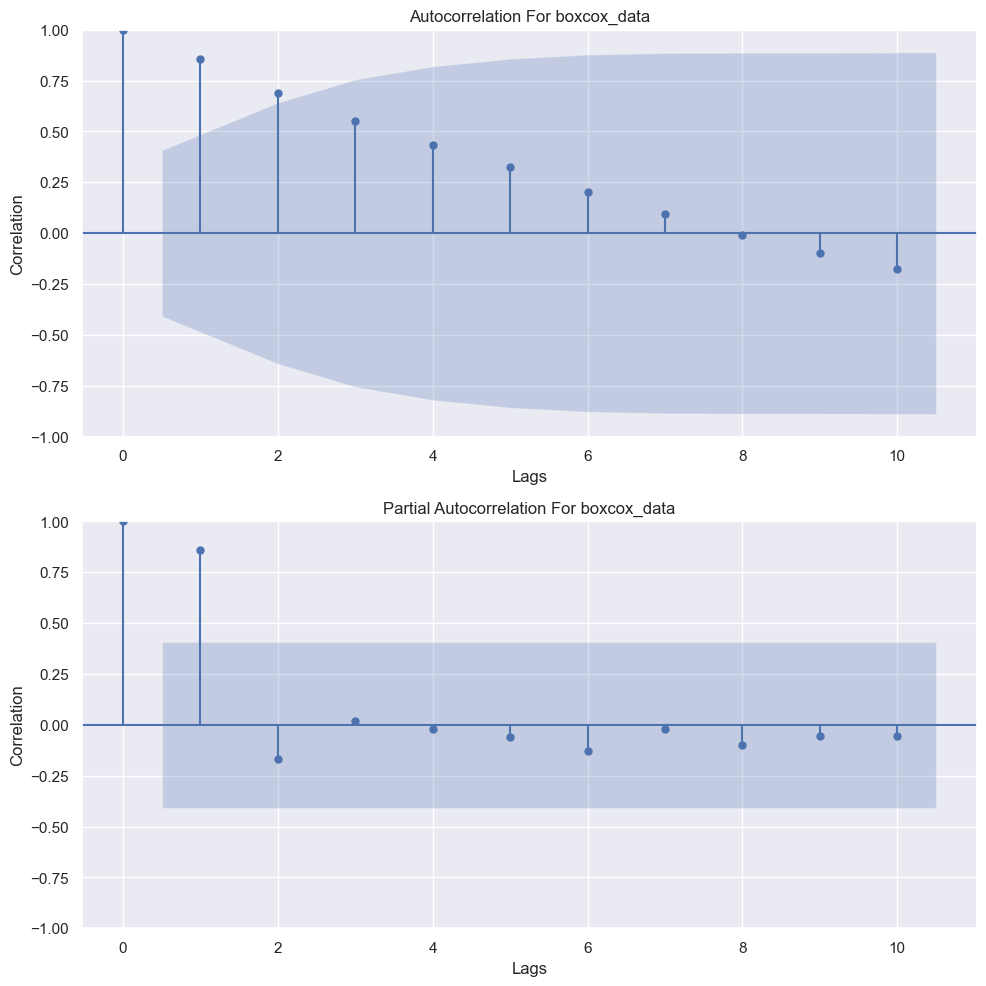

In [137]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
acf = plot_acf(pd.Series(boxcox_data).dropna(),lags=10,ax=ax1)
pacf = plot_pacf(pd.Series(boxcox_data).dropna(),lags=10,ax=ax2)
ax1.set_title('Autocorrelation For boxcox_data')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_title('Partial Autocorrelation For boxcox_data')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

- The ACF tailing off and PACF cutting at lag 2 statistically indicate that the Box-Cox transformed series is best explained by an AR(2) process (autoregressive model with order 2).

### Modelling Seasonal ARIMA

In [159]:

modelling_series = monthly_data['Close']
modelling_series

Date
2023-10-31    161.978783
2023-11-30    199.043526
2023-12-31    209.084577
2024-01-31    199.300988
2024-02-29    184.731941
2024-03-31    175.806403
2024-04-30    206.886243
2024-05-31    212.639223
2024-06-30    246.113698
2024-07-31    277.485068
2024-08-31    328.749916
2024-09-30    410.181542
2024-10-31    394.231329
2024-11-30    370.267436
2024-12-31    418.562613
2025-01-31    397.034700
2025-02-28    378.531799
2025-03-31    355.738251
2025-04-30    353.760747
2025-05-31    380.879697
2025-06-30    451.137355
2025-07-31    491.264116
2025-08-31    452.707897
Freq: ME, Name: Close, dtype: float64

#### Train Test Split

In [150]:
train,test = split(modelling_series, train_size = 0.6, shuffle=False)

In [148]:
train.head(2)

0    53.016483
1    61.734615
dtype: float64

In [149]:
test.head(2)

13     97.382909
14    106.515568
dtype: float64

In [142]:

print('Train',len(train))
print('Test',len(test))

Train 13
Test 10


In [160]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of grid search Model parameter combinations for Seasonal-ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))


Examples of grid search Model parameter combinations for Seasonal-ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)


### Hyper Parameter Tuning for Model Order

In [161]:

list_param = []
list_param_seasonal=[]
list_results_aic=[]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = model.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            list_param.append(param)
            list_param_seasonal.append(param_seasonal)
            list_results_aic.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:170.00675215717322
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-12.953995547133108
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(2, 2, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(2, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:146.90085432653825
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(0, 2, 0, 12)12 - AIC:4.0
ARIMA(0, 

- Pick the lowest AIC model ((0,0,0)x(1,0,0,12)).

- Check model diagnostics:

- Residual plots (should look like white noise).

- Ljung-Box test for autocorrelation in residuals.

- ACF/PACF of residuals.

- If residuals are not random, test the next-best model ((0,0,1)x(1,0,0,12) etc.).

- Use the best validated model for forecasting.

## Forecasting Seasonal ARIMA

In [163]:
model = sm.tsa.SARIMAX(train,order=(0,0,0),seasonal_order=(1,0,0,12))
results=model.fit()
forecasts_train = results.predict(start='2023-10-31',end='2024-10-31')
forecasts_test = results.predict(start='2024-11-01',end='2025-08-31')

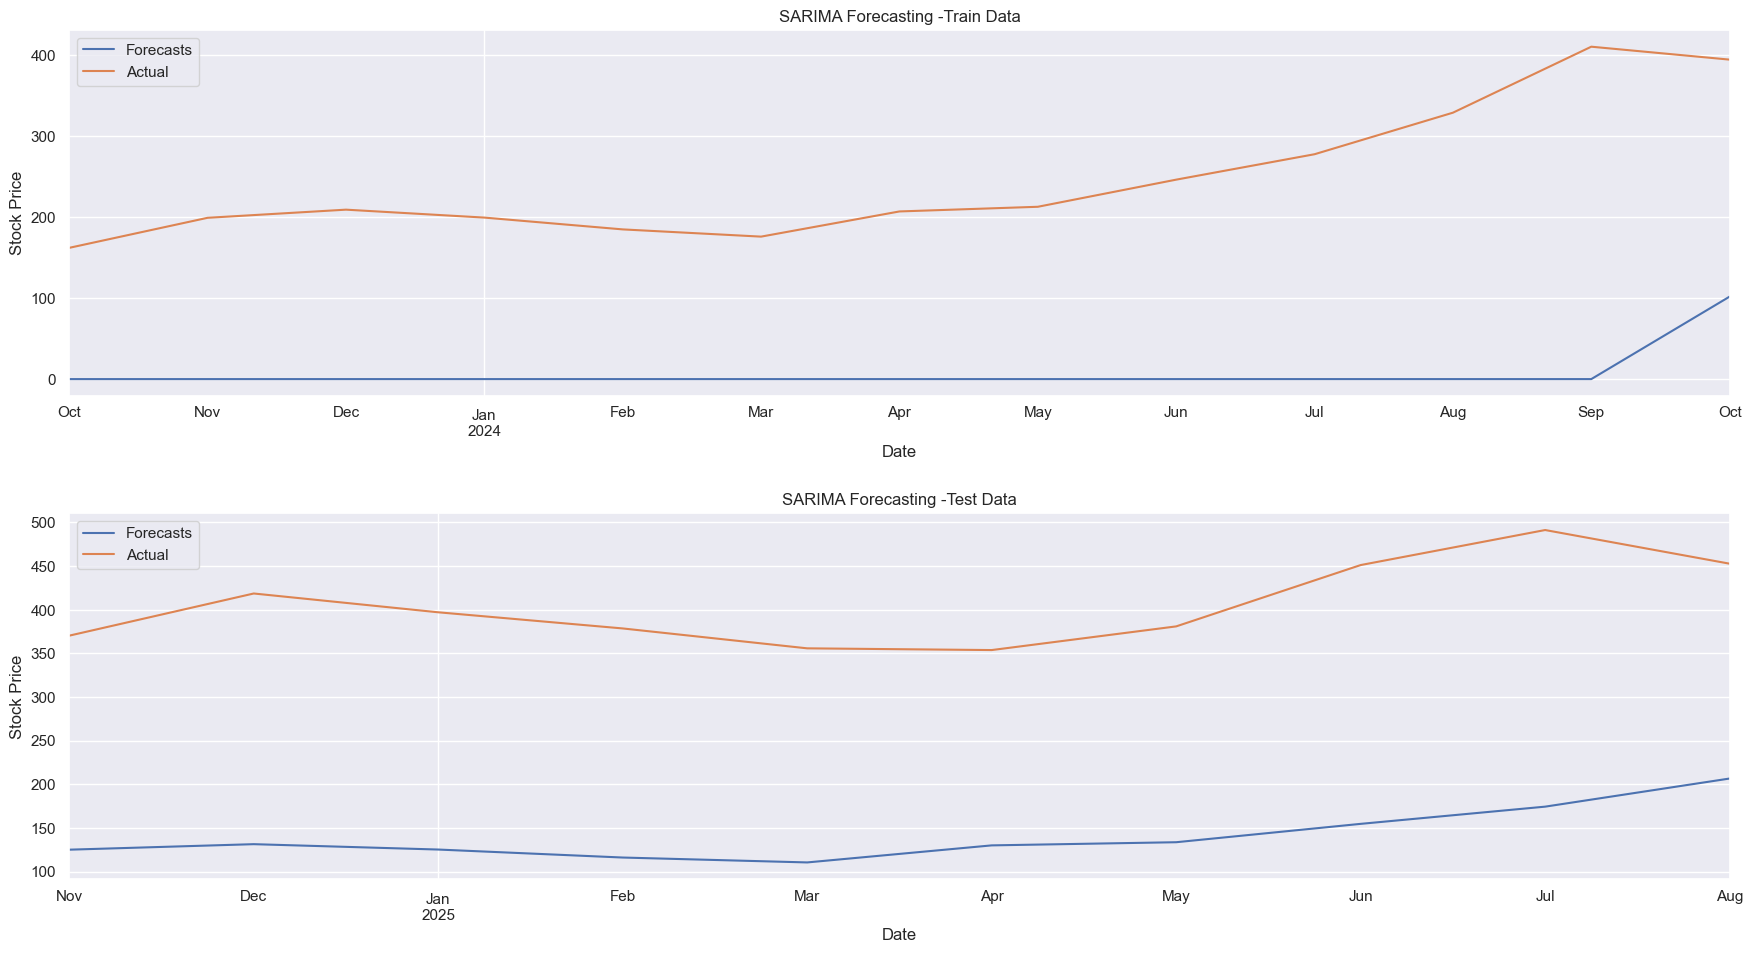

In [164]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
train.plot(label='Actual',ax=ax1)
ax1.set_ylabel('Stock Price')

forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
test.plot(label='Actual',ax=ax2)
ax2.set_ylabel('Stock Price')

ax1.legend()
ax2.legend()
plt.tight_layout(pad=2)

In [165]:
def result_metrics(test_series,forecast_series,model_name):
  print('Result Metrics for {}'.format(model_name))
  print('R2 Score : ',round(r2_score(test_series,forecast_series),3))
  print('Mean Squared Error : ',round(mean_squared_error(test_series,forecast_series),3))
  print('Mean Absolute Error : ',round(mean_absolute_error(test_series,forecast_series),3))

In [166]:

print(result_metrics(train,forecasts_train,'SARIMA-Train Data'))
print('----')
print(result_metrics(test,forecasts_test,'SARIMA-Test Data'))


Result Metrics for SARIMA-Train Data
R2 Score :  -8.911
Mean Squared Error :  61673.554
Mean Absolute Error :  238.803
None
----
Result Metrics for SARIMA-Test Data
R2 Score :  -34.932
Mean Squared Error :  70550.787
Mean Absolute Error :  264.222
None


In [167]:
print(results.summary())

                                SARIMAX Results                                 
Dep. Variable:                    Close   No. Observations:                   13
Model:             SARIMAX(1, 0, 0, 12)   Log Likelihood                 -90.325
Date:                  Sun, 31 Aug 2025   AIC                            184.650
Time:                          18:01:27   BIC                            185.780
Sample:                      10-31-2023   HQIC                           184.418
                           - 10-31-2024                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.6285      0.404      1.556      0.120      -0.163       1.420
sigma2      3.991e+04   4.87e-06    8.2e+09      0.000    3.99e+04    3.99e+04
Ljung-Box (L1) (Q):                 

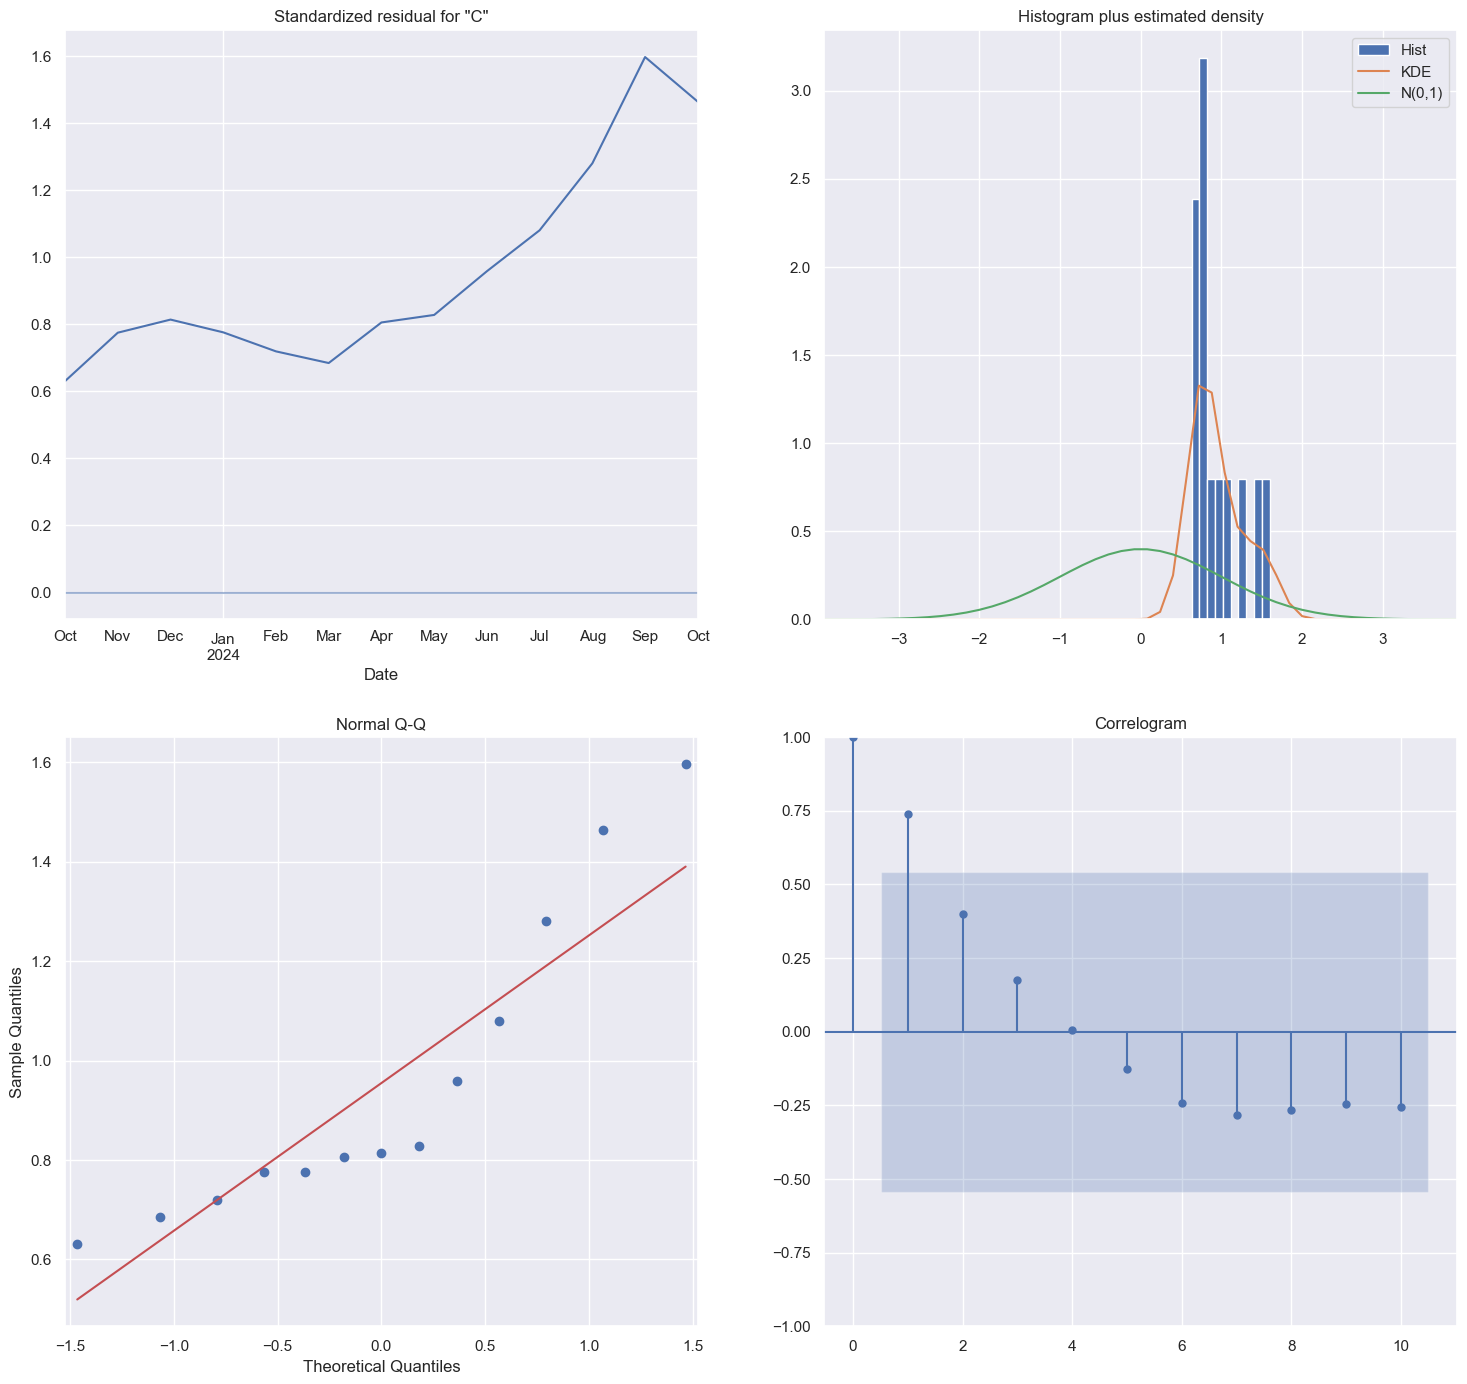

In [168]:
results.plot_diagnostics(figsize=(16, 16))
plt.show()

In [169]:
residuals_test = test-forecasts_test

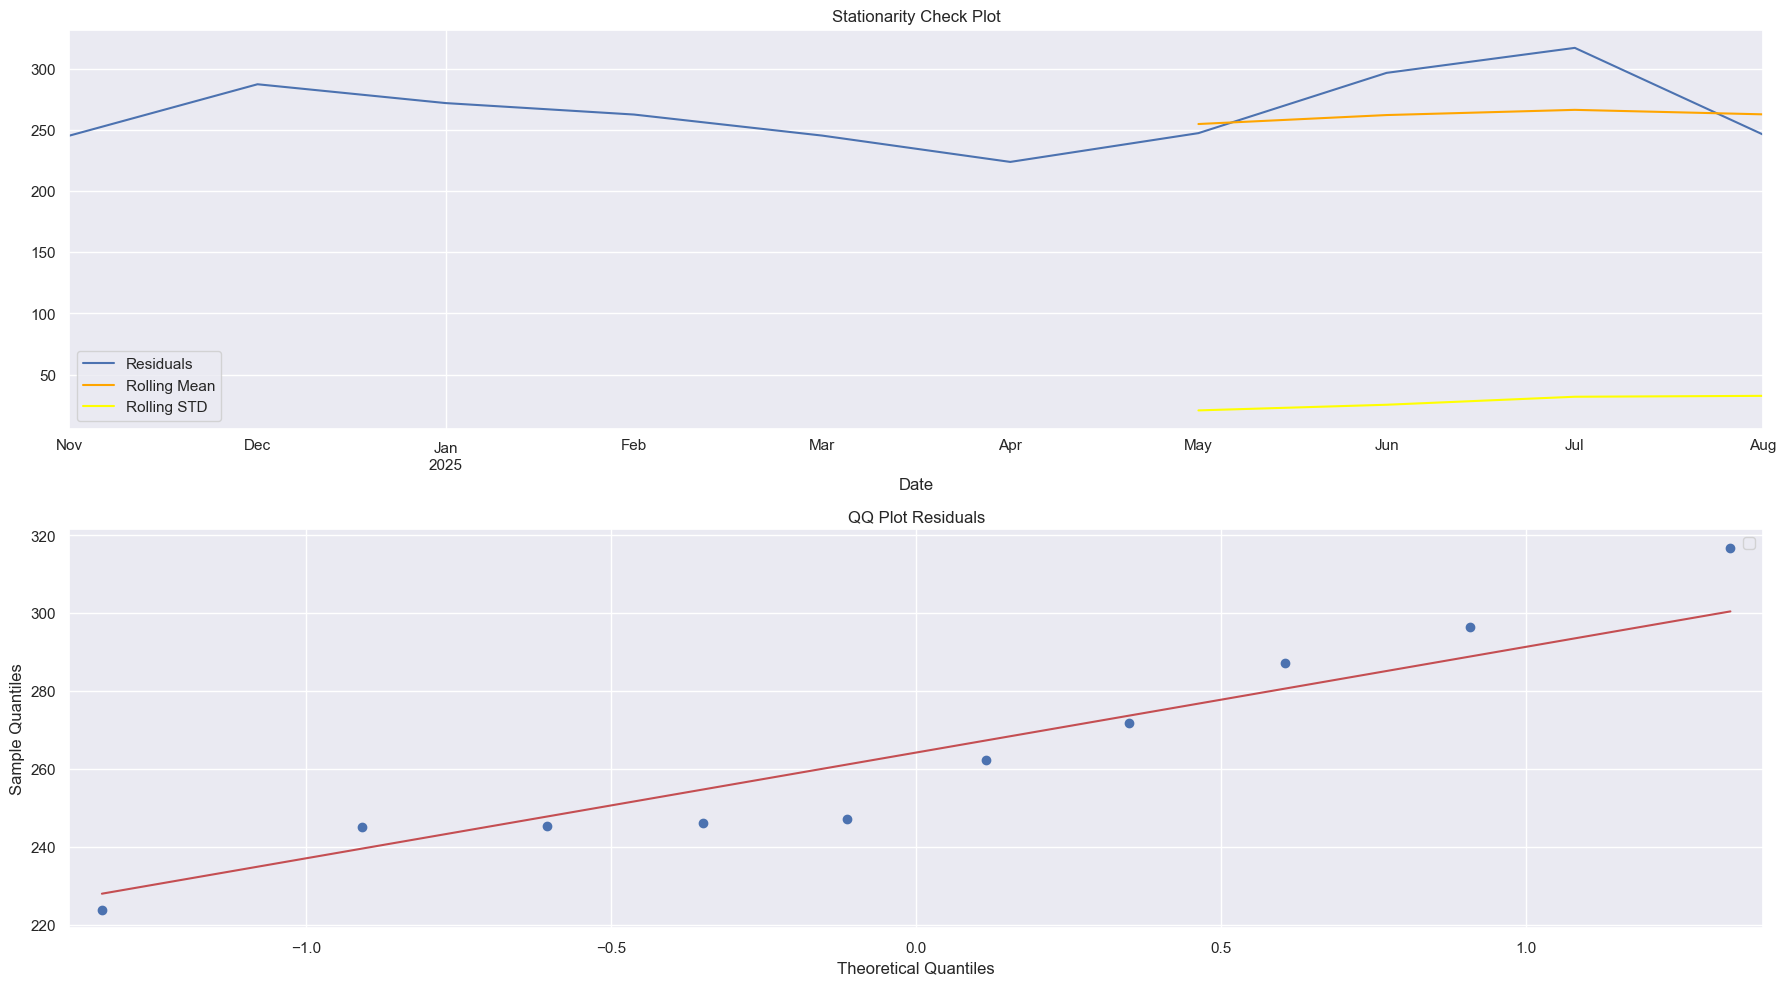

In [170]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))


residuals_test.plot(label='Residuals',ax=ax1,title='Stationarity Check Plot')
residuals_test.rolling(7).mean().plot(label='Rolling Mean',c='orange',ax=ax1)
residuals_test.rolling(7).std().plot(label='Rolling STD',c='yellow',ax=ax1)

qq_plot = qq(residuals_test,line='s',ax=ax2)
ax2.set_title('QQ Plot Residuals')
ax1.legend()
ax2.legend()
plt.tight_layout(pad=1)

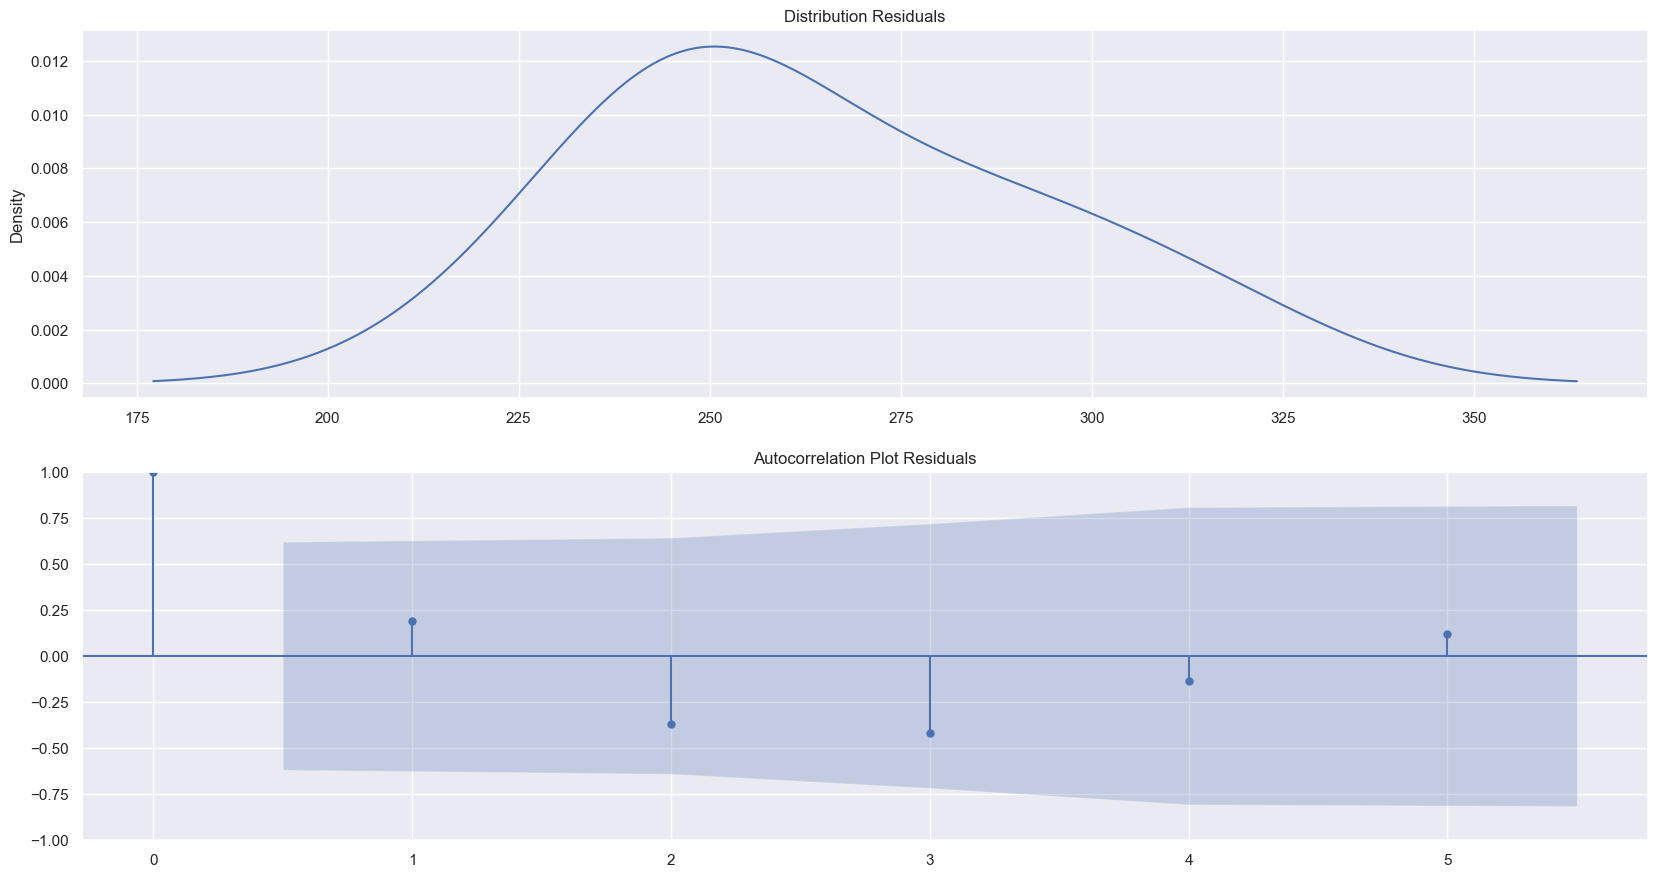

In [171]:

fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

residuals_test.plot(kind='kde',ax=ax1,title='Distribution Residuals')

acf = plot_acf(residuals_test,ax=ax2,title='Autocorrelation Plot Residuals')

In [172]:

residuals_test.describe()

count     10.000000
mean     264.221767
std       28.628760
min      223.739531
25%      245.462111
50%      254.838379
75%      283.315005
max      316.873856
dtype: float64

In [173]:

train_list = {}
test_list = {}
time_series_splits = TimeSeriesSplit(n_splits=4)
X = modelling_series.values

index = 1
for train_index, test_index in time_series_splits.split(X):
    train = X[train_index]
    test = X[test_index]
    train_list[index] = train
    test_list[index] = test
    index += 1

In [174]:

modelling_series

Date
2023-10-31    161.978783
2023-11-30    199.043526
2023-12-31    209.084577
2024-01-31    199.300988
2024-02-29    184.731941
2024-03-31    175.806403
2024-04-30    206.886243
2024-05-31    212.639223
2024-06-30    246.113698
2024-07-31    277.485068
2024-08-31    328.749916
2024-09-30    410.181542
2024-10-31    394.231329
2024-11-30    370.267436
2024-12-31    418.562613
2025-01-31    397.034700
2025-02-28    378.531799
2025-03-31    355.738251
2025-04-30    353.760747
2025-05-31    380.879697
2025-06-30    451.137355
2025-07-31    491.264116
2025-08-31    452.707897
Freq: ME, Name: Close, dtype: float64

In [175]:

train_list[1]

array([161.97878265, 199.04352646, 209.08457718, 199.30098801,
       184.73194086, 175.80640327, 206.88624344])

## Facebook's Prophet Model for Time Series

In [176]:
##Getting Data Ready for the Model
prophet_data = monthly_data
prophet_data['Date'] = prophet_data.index
prophet_data
     

Close  Year      Month  dayofweek  quarter  Stationary_data  \
Date                                                                           
2023-10-31  161.978783  2023    October    Tuesday        4              NaN   
2023-11-30  199.043526  2023   November   Thursday        4              NaN   
2023-12-31  209.084577  2023   December     Sunday        4              NaN   
2024-01-31  199.300988  2024    January  Wednesday        1              NaN   
2024-02-29  184.731941  2024   February   Thursday        1              NaN   
2024-03-31  175.806403  2024      March     Sunday        1              NaN   
2024-04-30  206.886243  2024      April    Tuesday        2              NaN   
2024-05-31  212.639223  2024        May     Friday        2              NaN   
2024-06-30  246.113698  2024       June     Sunday        2              NaN   
2024-07-31  277.485068  2024       July  Wednesday        3              NaN   
2024-08-31  328.749916  2024     August   Saturday        3              NaN   
2024-09-30  410.181542  2024  September     Monday        3              NaN   
2024-10-31  394.231329  2024    October   Thursday        4              NaN   
2024-11-30  370.267436  2024   November   Saturday        4              NaN   
2024-12-31  418.562613  2024   December    Tuesday        4              NaN   
2025-01-31  397.034700  2025    January     Friday        1              NaN   
2025-02-28  378.531799  2025   February     Friday        1              NaN   
2025-03-31  355.738251  2025      March     Monday        1              NaN   
2025-04-30  353.760747  2025      April  Wednesday        2              NaN   
2025-05-31  380.879697  2025        May   Saturday        2              NaN   
2025-06-30  451.137355  2025       June     Monday        2              NaN   
2025-07-31  491.264116  2025       July   Thursday        3              NaN   
2025-08-31  452.707897  2025     August     Sunday        3              NaN   

                 Date  
Date                   
2023-10-31 2023-10-31  
2023-11-30 2023-11-30  
2023-12-31 2023-12-31  
2024-01-31 2024-01-31  
2024-02-29 2024-02-29  
2024-03-31 2024-03-31  
2024-04-30 2024-04-30  
2024-05-31 2024-05-31  
2024-06-30 2024-06-30  
2024-07-31 2024-07-31  
2024-08-31 2024-08-31  
2024-09-30 2024-09-30  
2024-10-31 2024-10-31  
2024-11-30 2024-11-30  
2024-12-31 2024-12-31  
2025-01-31 2025-01-31  
2025-02-28 2025-02-28  
2025-03-31 2025-03-31  
2025-04-30 2025-04-30  
2025-05-31 2025-05-31  
2025-06-30 2025-06-30  
2025-07-31 2025-07-31  
2025-08-31 2025-08-31

In [177]:

prophet_data.drop(labels=['Year','Month'],axis=1,inplace=True)

In [178]:

prophet_data = prophet_data.reindex(columns=['Date','Close'])

In [180]:
##Prophet needs two columns in form of ds and y being Date and series
prophet_data.rename(columns={'Date':'ds',
                   'Close':'y'},inplace=True)

In [181]:
prophet_data

ds           y
Date                             
2023-10-31 2023-10-31  161.978783
2023-11-30 2023-11-30  199.043526
2023-12-31 2023-12-31  209.084577
2024-01-31 2024-01-31  199.300988
2024-02-29 2024-02-29  184.731941
2024-03-31 2024-03-31  175.806403
2024-04-30 2024-04-30  206.886243
2024-05-31 2024-05-31  212.639223
2024-06-30 2024-06-30  246.113698
2024-07-31 2024-07-31  277.485068
2024-08-31 2024-08-31  328.749916
2024-09-30 2024-09-30  410.181542
2024-10-31 2024-10-31  394.231329
2024-11-30 2024-11-30  370.267436
2024-12-31 2024-12-31  418.562613
2025-01-31 2025-01-31  397.034700
2025-02-28 2025-02-28  378.531799
2025-03-31 2025-03-31  355.738251
2025-04-30 2025-04-30  353.760747
2025-05-31 2025-05-31  380.879697
2025-06-30 2025-06-30  451.137355
2025-07-31 2025-07-31  491.264116
2025-08-31 2025-08-31  452.707897

In [182]:
prophet_train,prophet_test = split(prophet_data,train_size=0.6,shuffle=False)
print('Training Data Size :',len(prophet_train))
print('Testing Data Size :',len(prophet_test))

Training Data Size : 13
Testing Data Size : 10


In [183]:
##Model Fitting Basic Model
prophet_model = Prophet(yearly_seasonality=True)
prophet_model.fit(prophet_train)

18:06:42 - cmdstanpy - INFO - Chain [1] start processing
18:06:43 - cmdstanpy - INFO - Chain [1] done processing


In [184]:
future= prophet_model.make_future_dataframe(periods=39,freq='M')

In [185]:
future

ds
0  2023-10-31
1  2023-11-30
2  2023-12-31
3  2024-01-31
4  2024-02-29
5  2024-03-31
6  2024-04-30
7  2024-05-31
8  2024-06-30
9  2024-07-31
10 2024-08-31
11 2024-09-30
12 2024-10-31
13 2024-11-30
14 2024-12-31
15 2025-01-31
16 2025-02-28
17 2025-03-31
18 2025-04-30
19 2025-05-31
20 2025-06-30
21 2025-07-31
22 2025-08-31
23 2025-09-30
24 2025-10-31
25 2025-11-30
26 2025-12-31
27 2026-01-31
28 2026-02-28
29 2026-03-31
30 2026-04-30
31 2026-05-31
32 2026-06-30
33 2026-07-31
34 2026-08-31
35 2026-09-30
36 2026-10-31
37 2026-11-30
38 2026-12-31
39 2027-01-31
40 2027-02-28
41 2027-03-31
42 2027-04-30
43 2027-05-31
44 2027-06-30
45 2027-07-31
46 2027-08-31
47 2027-09-30
48 2027-10-31
49 2027-11-30
50 2027-12-31
51 2028-01-31

In [187]:
##Predicting Using Prophet
forecast=prophet_model.predict(future)
forecast = forecast.set_index('ds')

In [188]:
prophet_df = pd.concat([forecast['yhat'],prophet_data['y']],axis=1,ignore_index=True)
prophet_df.columns = ['Predicted','Actual']
prophet_df

Predicted      Actual
2023-10-31  161.981658  161.978783
2023-11-30  199.040910  199.043526
2023-12-31  209.084293  209.084577
2024-01-31  199.302026  199.300988
2024-02-29  184.731054  184.731941
2024-03-31  175.806036  175.806403
2024-04-30  206.887582  206.886243
2024-05-31  212.637022  212.639223
2024-06-30  246.114550  246.113698
2024-07-31  277.486946  277.485068
2024-08-31  328.746707  328.749916
2024-09-30  410.182127  410.181542
2024-10-31  394.234378  394.231329
2024-11-30 -156.094983  370.267436
2024-12-31  693.460811  418.562613
2025-01-31   -3.609675  397.034700
2025-02-28  123.639314  378.531799
2025-03-31  424.583156  355.738251
2025-04-30   87.556571  353.760747
2025-05-31  315.752526  380.879697
2025-06-30  318.353182  451.137355
2025-07-31  351.337282  491.264116
2025-08-31  311.723197  452.707897
2025-09-30  512.126243         NaN
2025-10-31  386.372869         NaN
2025-11-30   33.758504         NaN
2025-12-31  603.478365         NaN
2026-01-31  133.900583         NaN
2026-02-28   64.054798         NaN
2026-03-31  672.615948         NaN
2026-04-30  -33.034391         NaN
2026-05-31  420.827111         NaN
2026-06-30  390.364756         NaN
2026-07-31  424.013783         NaN
2026-08-31  294.847449         NaN
2026-09-30  614.433324         NaN
2026-10-31  379.418974         NaN
2026-11-30  222.645106         NaN
2026-12-31  512.455551         NaN
2027-01-31  272.021384         NaN
2027-02-28    6.037171         NaN
2027-03-31  919.749881         NaN
2027-04-30 -154.745085         NaN
2027-05-31  527.837639         NaN
2027-06-30  462.110788         NaN
2027-07-31  495.505904         NaN
2027-08-31  278.183085         NaN
2027-09-30  717.077021         NaN
2027-10-31  373.398046         NaN
2027-11-30  410.457297         NaN
2027-12-31  420.500678         NaN
2028-01-31  410.718411         NaN

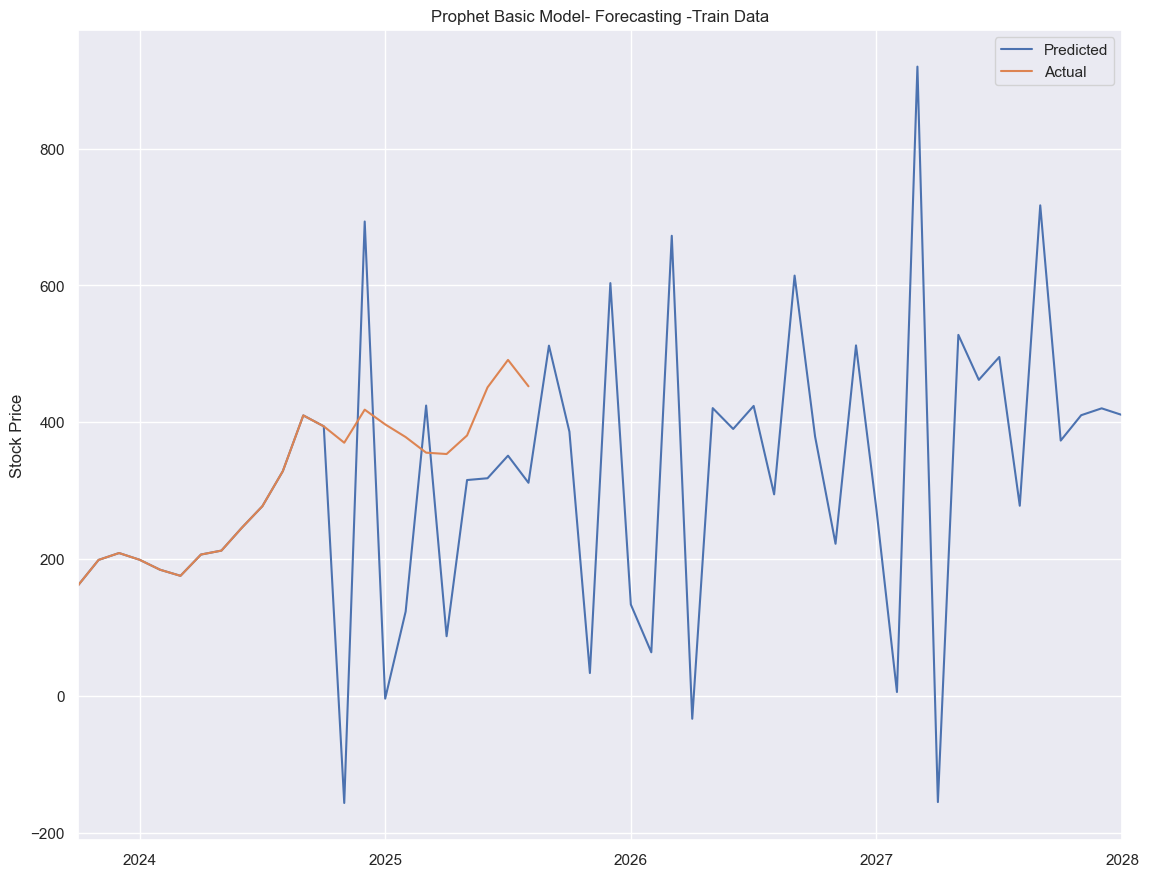

In [192]:
fig = plt.figure(figsize=(12,10))
prophet_df['Predicted'][:57].plot(label='Predicted')
prophet_df['Actual'][:57].plot(label='Actual')
plt.title('Prophet Basic Model- Forecasting -Train Data')
plt.ylabel('Stock Price')
plt.legend()

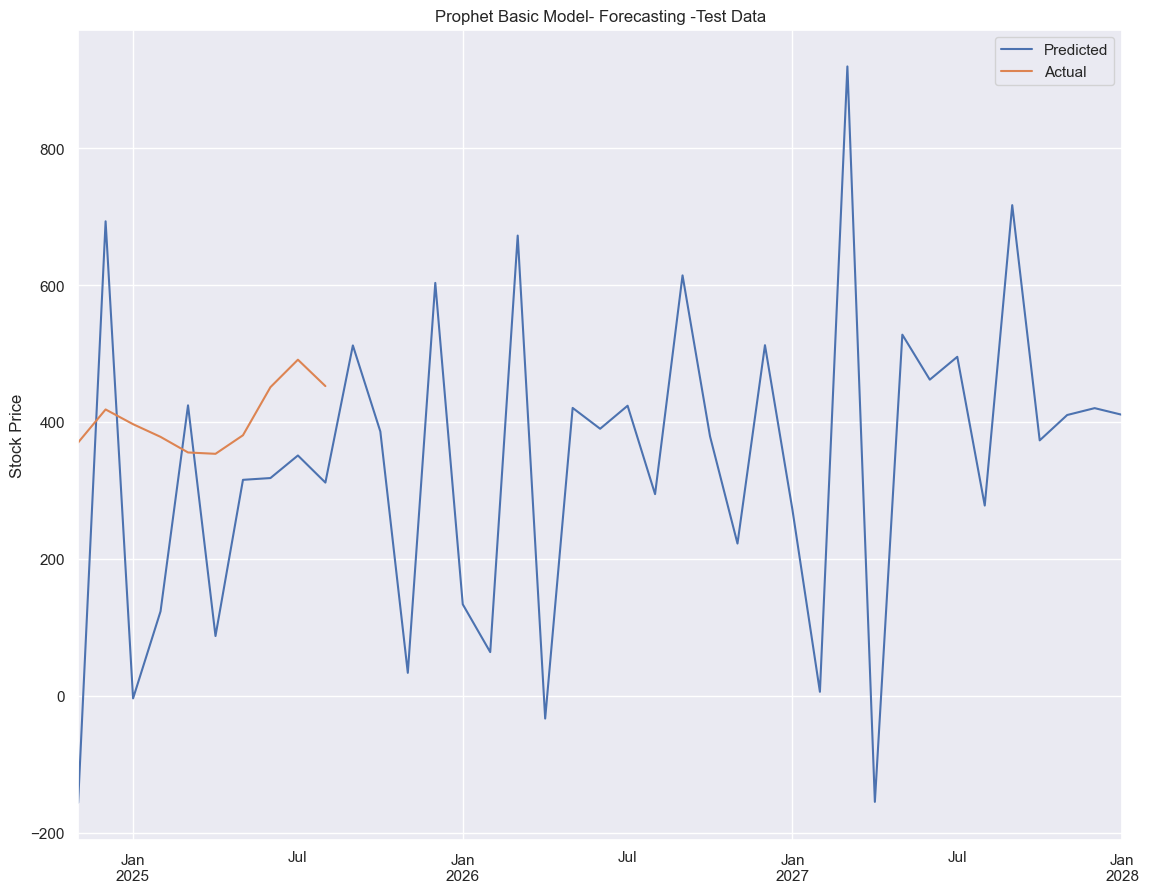

In [193]:
fig = plt.figure(figsize=(12,10))
prophet_df['Predicted'][13:].plot(label='Predicted')
prophet_df['Actual'][13:].plot(label='Actual')
plt.title('Prophet Basic Model- Forecasting -Test Data')
plt.ylabel('Stock Price')
plt.legend()

In [196]:
print(result_metrics(prophet_df['Actual'][:13],prophet_df['Predicted'][:13],'Prophet Basic-Train Data'))

Result Metrics for Prophet Basic-Train Data
R2 Score :  1.0
Mean Squared Error :  0.0
Mean Absolute Error :  0.002
None


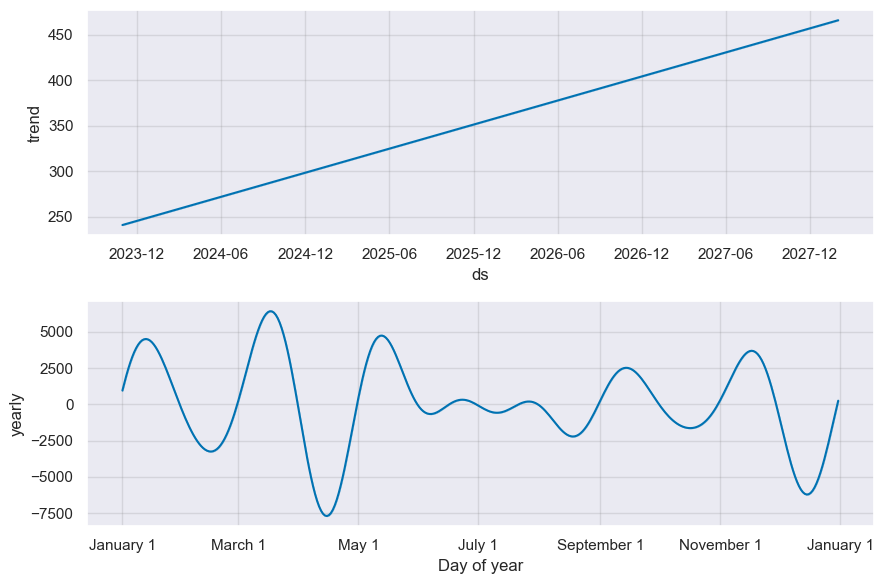

In [199]:
forecast = prophet_model.predict(future)


forecast_for_plot = forecast.copy()

forecast_indexed = forecast.set_index('ds')


fig = prophet_model.plot_components(forecast_for_plot)

In [200]:

print('Head',prophet_test.head(1))
print('Tail',prophet_test.tail(1))

Head                    ds           y
Date                             
2024-11-30 2024-11-30  370.267436
Tail                    ds           y
Date                             
2025-08-31 2025-08-31  452.707897


### Hyper-Tuning for Prophet Model

In [201]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.3,0.4],
              'holidays_prior_scale':[0.3,0.4],
              'n_changepoints' : [20,50]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 16


In [202]:

df = prophet_data 

In [203]:
prophet_train_hyper,prophet_test_hyper = split(prophet_data,train_size=0.7,shuffle=False)

In [204]:

prophet_test_hyper.head(5)

ds           y
Date                             
2025-02-28 2025-02-28  378.531799
2025-03-31 2025-03-31  355.738251
2025-04-30 2025-04-30  353.760747
2025-05-31 2025-05-31  380.879697
2025-06-30 2025-06-30  451.137355

In [205]:

len(prophet_test_hyper)

7

In [210]:
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd

strt = '2023-08-31'
end = '2025-08-31'

results = []  # collect results here

for i in grid:
    print(i)
    
    # Build and fit Prophet model
    train_model = Prophet(
        changepoint_prior_scale=i['changepoint_prior_scale'],
        holidays_prior_scale=i['holidays_prior_scale'],
        n_changepoints=i['n_changepoints'],
        seasonality_mode=i['seasonality_mode'],
        weekly_seasonality=False,
        daily_seasonality=False,
        yearly_seasonality=True
    )
    
    train_model.fit(prophet_train_hyper)
    
    # Forecast 29 months ahead
    train_forecast = train_model.make_future_dataframe(periods=29, freq='M', include_history=False)
    train_forecast = train_model.predict(train_forecast)
    
    test = train_forecast[['ds', 'yhat']]
    Actual = df[(df['ds'] >= strt) & (df['ds'] <= end)][['ds', 'y']]
    
    # ✅ FIX: Proper merge to align Actual & Forecast
    comparison = pd.merge(Actual, test, on='ds', how='inner')
    
    # Calculate MAPE
    MAPE = mean_absolute_percentage_error(comparison['y'], comparison['yhat'])
    print('MAPE:', MAPE)
    
    # Save result
    results.append({'MAPE': MAPE, 'Parameters': i})

# Convert results into a DataFrame
model_parameters = pd.DataFrame(results)

# Sort by best MAPE
model_parameters = model_parameters.sort_values(by='MAPE').reset_index(drop=True)

print("\nBest Parameters:")
print(model_parameters.iloc[0])


{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative'}


22:08:49 - cmdstanpy - INFO - Chain [1] start processing
22:09:00 - cmdstanpy - INFO - Chain [1] done processing
22:09:00 - cmdstanpy - INFO - Chain [1] start processing


MAPE: 0.6577335659657361
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 20, 'seasonality_mode': 'additive'}


22:09:11 - cmdstanpy - INFO - Chain [1] done processing
22:09:11 - cmdstanpy - INFO - Chain [1] start processing


MAPE: 0.39634830386978975
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


22:09:22 - cmdstanpy - INFO - Chain [1] done processing
22:09:22 - cmdstanpy - INFO - Chain [1] start processing


MAPE: 0.6577335659657361
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


22:09:33 - cmdstanpy - INFO - Chain [1] done processing
22:09:33 - cmdstanpy - INFO - Chain [1] start processing


MAPE: 0.39634830386978975
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative'}


22:09:43 - cmdstanpy - INFO - Chain [1] done processing
22:09:43 - cmdstanpy - INFO - Chain [1] start processing


MAPE: 0.6577335659657361
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 20, 'seasonality_mode': 'additive'}


22:09:54 - cmdstanpy - INFO - Chain [1] done processing
22:09:54 - cmdstanpy - INFO - Chain [1] start processing


MAPE: 0.39634830386978975
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


22:10:06 - cmdstanpy - INFO - Chain [1] done processing
22:10:06 - cmdstanpy - INFO - Chain [1] start processing


MAPE: 0.6577335659657361
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


22:10:18 - cmdstanpy - INFO - Chain [1] done processing
22:10:18 - cmdstanpy - INFO - Chain [1] start processing


MAPE: 0.39634830386978975
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative'}


22:10:31 - cmdstanpy - INFO - Chain [1] done processing
22:10:31 - cmdstanpy - INFO - Chain [1] start processing


MAPE: 0.4367586967565443
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 20, 'seasonality_mode': 'additive'}


22:10:46 - cmdstanpy - INFO - Chain [1] done processing
22:10:46 - cmdstanpy - INFO - Chain [1] start processing


MAPE: 0.40250143142268197
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


22:10:59 - cmdstanpy - INFO - Chain [1] done processing
22:10:59 - cmdstanpy - INFO - Chain [1] start processing


MAPE: 0.4367586967565443
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


22:11:12 - cmdstanpy - INFO - Chain [1] done processing
22:11:12 - cmdstanpy - INFO - Chain [1] start processing


MAPE: 0.40250143142268197
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative'}


22:11:24 - cmdstanpy - INFO - Chain [1] done processing
22:11:25 - cmdstanpy - INFO - Chain [1] start processing


MAPE: 0.4367586967565443
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 20, 'seasonality_mode': 'additive'}


22:11:36 - cmdstanpy - INFO - Chain [1] done processing
22:11:36 - cmdstanpy - INFO - Chain [1] start processing


MAPE: 0.40250143142268197
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


22:11:48 - cmdstanpy - INFO - Chain [1] done processing
22:11:49 - cmdstanpy - INFO - Chain [1] start processing


MAPE: 0.4367586967565443
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


22:12:05 - cmdstanpy - INFO - Chain [1] done processing


MAPE: 0.40250143142268197

Best Parameters:
MAPE                                                   0.396348
Parameters    {'changepoint_prior_scale': 0.3, 'holidays_pri...
Name: 0, dtype: object


In [211]:
parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters.head(3)

MAPE                                         Parameters
0  0.396348  {'changepoint_prior_scale': 0.3, 'holidays_pri...
1  0.396348  {'changepoint_prior_scale': 0.3, 'holidays_pri...
2  0.396348  {'changepoint_prior_scale': 0.3, 'holidays_pri...

In [212]:
parameters['Parameters'][0]

{'changepoint_prior_scale': 0.3,
 'holidays_prior_scale': 0.3,
 'n_changepoints': 20,
 'seasonality_mode': 'additive'}

- The best Prophet model selected by grid search used a high trend flexibility (changepoint_prior_scale=0.3) and multiple trend breakpoints (n_changepoints=20), indicating that the series undergoes frequent shifts in trend. Seasonal effects were best modeled as additive rather than multiplicative, suggesting consistent seasonal strength across time. Holidays were found to have a moderate impact (holidays_prior_scale=0.3).

In [215]:
print(prophet_train_hyper['ds'].min(), prophet_train_hyper['ds'].max())

2023-10-31 00:00:00 2025-01-31 00:00:00


In [216]:
prophet_tuned_model = Prophet(
                      growth='linear',
                      changepoint_prior_scale= 0.001,
                      holidays_prior_scale = 0.02,
                      seasonality_prior_scale=0.3,
                      
                      seasonality_mode = 'additive',
                      weekly_seasonality=False,
                      daily_seasonality = False,
                      yearly_seasonality = True,
                      changepoints=['2023-10-31']
                      )
prophet_tuned_model.add_country_holidays(country_name='IND')
prophet_tuned_model.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)
prophet_tuned_model.add_seasonality(name='yearly', period=365, fourier_order=20)
prophet_tuned_model.add_country_holidays(country_name='IND')
prophet_tuned_model.fit(prophet_train_hyper)

Changing country holidays from 'IND' to 'IND'.
22:17:41 - cmdstanpy - INFO - Chain [1] start processing
22:17:43 - cmdstanpy - INFO - Chain [1] done processing


In [220]:
future_hyper = prophet_tuned_model.make_future_dataframe(periods=29, freq='M')

In [221]:

forecast = prophet_tuned_model.predict(future_hyper)

In [224]:
prophet_hyper_df = pd.merge(
    df[['ds','y']],               # Actual values
    forecast[['ds','yhat']],      # Prophet predictions
    on='ds',
    how='left'
).rename(columns={'y': 'Actual', 'yhat': 'Predicted'})

print(prophet_hyper_df.head())

          ds      Actual   Predicted
0 2023-10-31  161.978783  161.978888
1 2023-11-30  199.043526  199.043561
2 2023-12-31  209.084577  209.084860
3 2024-01-31  199.300988  199.301067
4 2024-02-29  184.731941  184.731909


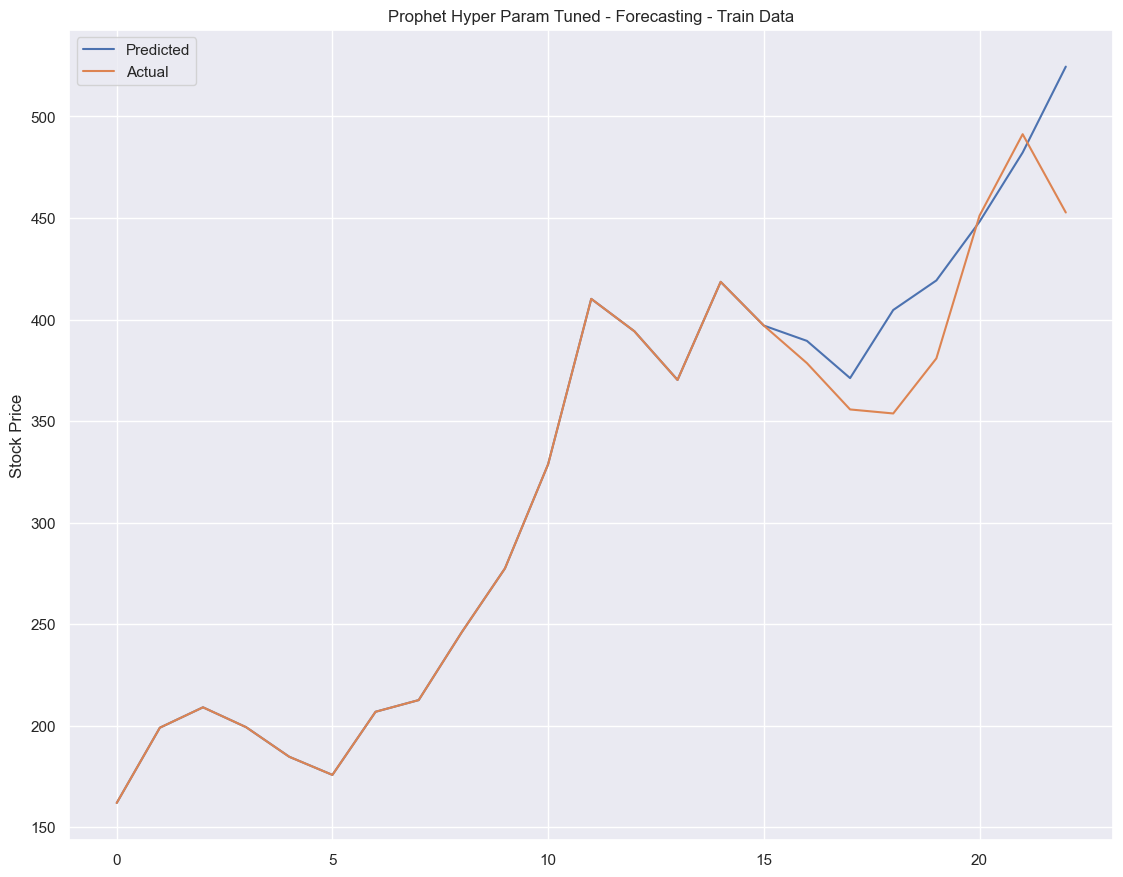

In [225]:
fig = plt.figure(figsize=(12,10))
prophet_hyper_df['Predicted'][:57].plot(label='Predicted')
prophet_hyper_df['Actual'][:57].plot(label='Actual')
plt.title('Prophet Hyper Param Tuned - Forecasting - Train Data')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [227]:
test_df = prophet_hyper_df[(prophet_hyper_df['ds'] >= strt) & (prophet_hyper_df['ds'] <= end)]

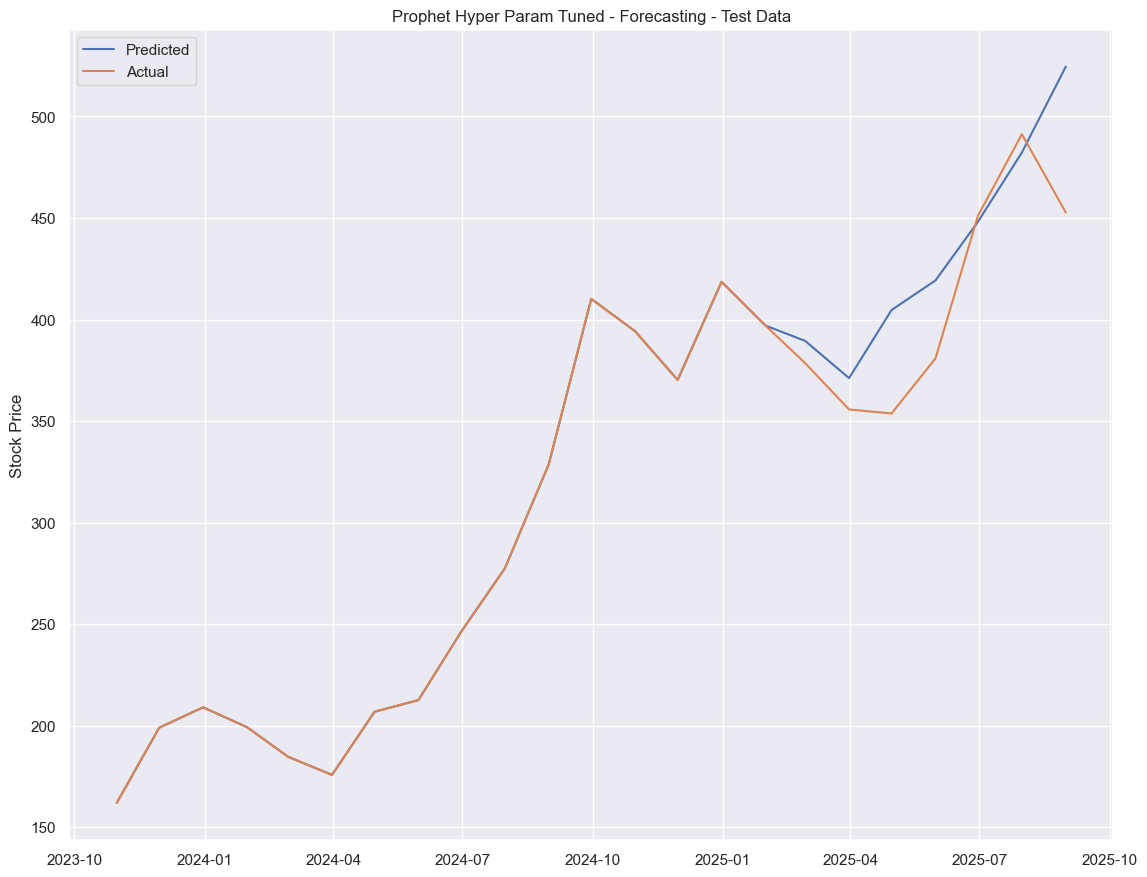

In [228]:
fig = plt.figure(figsize=(12,10))
plt.plot(test_df['ds'], test_df['Predicted'], label='Predicted')
plt.plot(test_df['ds'], test_df['Actual'], label='Actual')
plt.title('Prophet Hyper Param Tuned - Forecasting - Test Data')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [229]:
result_metrics(prophet_hyper_df['Actual'][:67],prophet_hyper_df['Predicted'][:67],'Hyper-Tuned Prophet Train Data')
     

Result Metrics for Hyper-Tuned Prophet Train Data
R2 Score :  0.96
Mean Squared Error :  420.633
Mean Absolute Error :  8.675


In [231]:
test_df = prophet_hyper_df[(prophet_hyper_df['ds'] >= strt) & (prophet_hyper_df['ds'] <= end)]
result_metrics(test_df['Actual'], test_df['Predicted'], 'Hyper-Tuned Prophet Test Data')

Result Metrics for Hyper-Tuned Prophet Test Data
R2 Score :  0.96
Mean Squared Error :  420.633
Mean Absolute Error :  8.675
